In [1]:
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
suppressPackageStartupMessages(library(gplots))
options(future.globals.maxSize= 8*1024^3)
source('/home/z4li/zhen/scripts/R/functions/markers.R')
source('/home/z4li/zhen/scripts/R/functions/gg_color_hue.R')
source('/home/z4li/zhen/scripts/R/functions/heatmap.3.R')

In [2]:
df0<-readRDS("../Publication/SeuratObject.rds")

In [3]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

# Figure 6a and b

In [4]:
DefaultAssay(df0) <- "SCT"

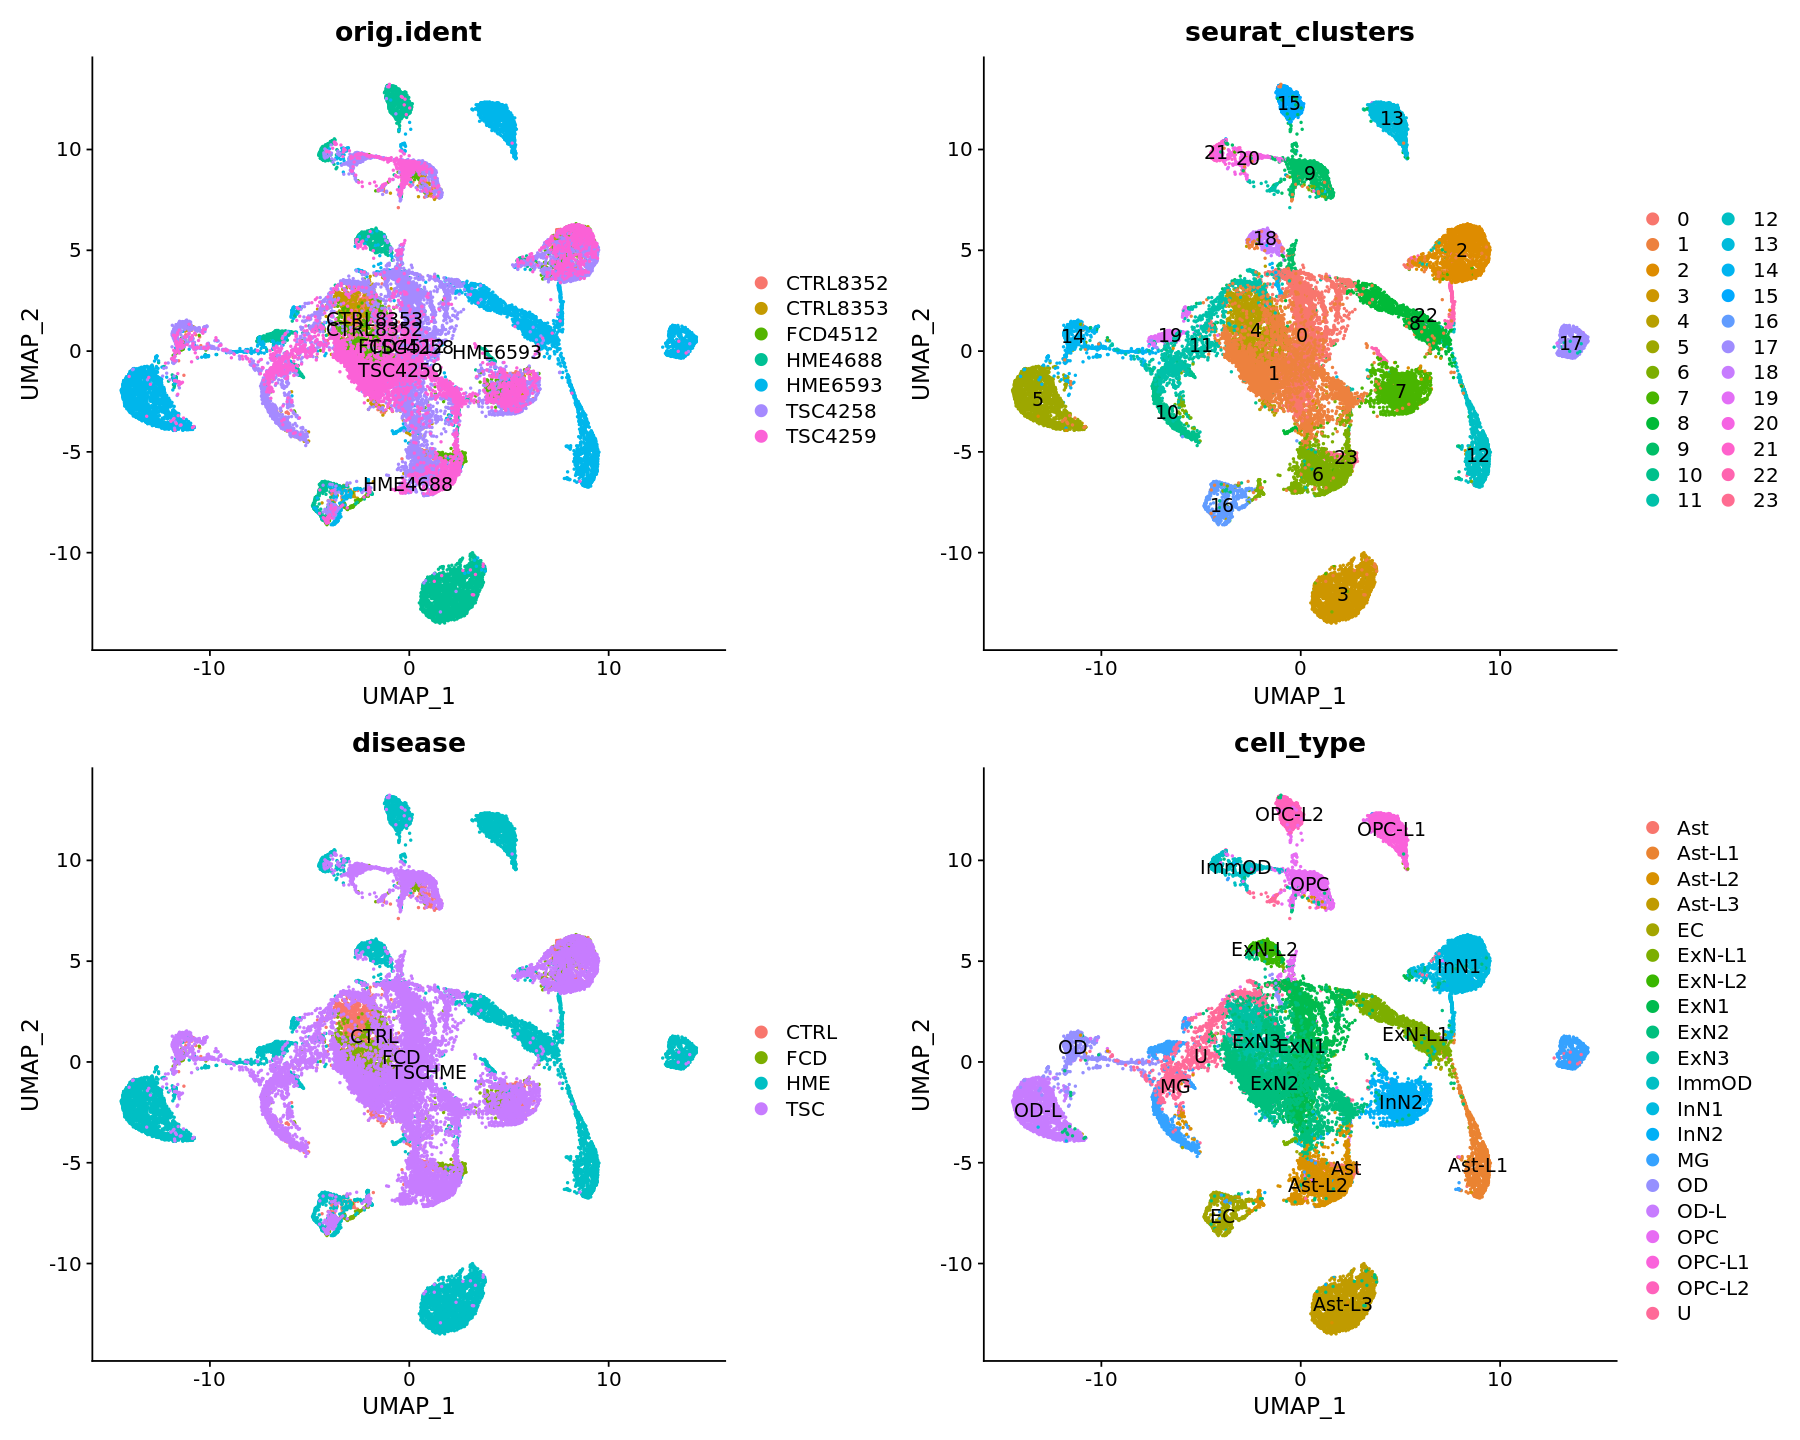

In [6]:
options(repr.plot.width=15, repr.plot.height=12)
DimPlot(df0, reduction = 'umap',pt.size=0.3, group.by =c('orig.ident', 'seurat_clusters','disease','cell_type'),label = T)

In [9]:
pdf("Figure6a_UMAPs.pdf",width=15, height=12)
options(repr.plot.width=15, repr.plot.height=12)
DimPlot(df0, reduction = 'umap',pt.size=0.3, group.by =c('orig.ident', 'seurat_clusters','disease','cell_type'),label = T)
dev.off()

png 
  2

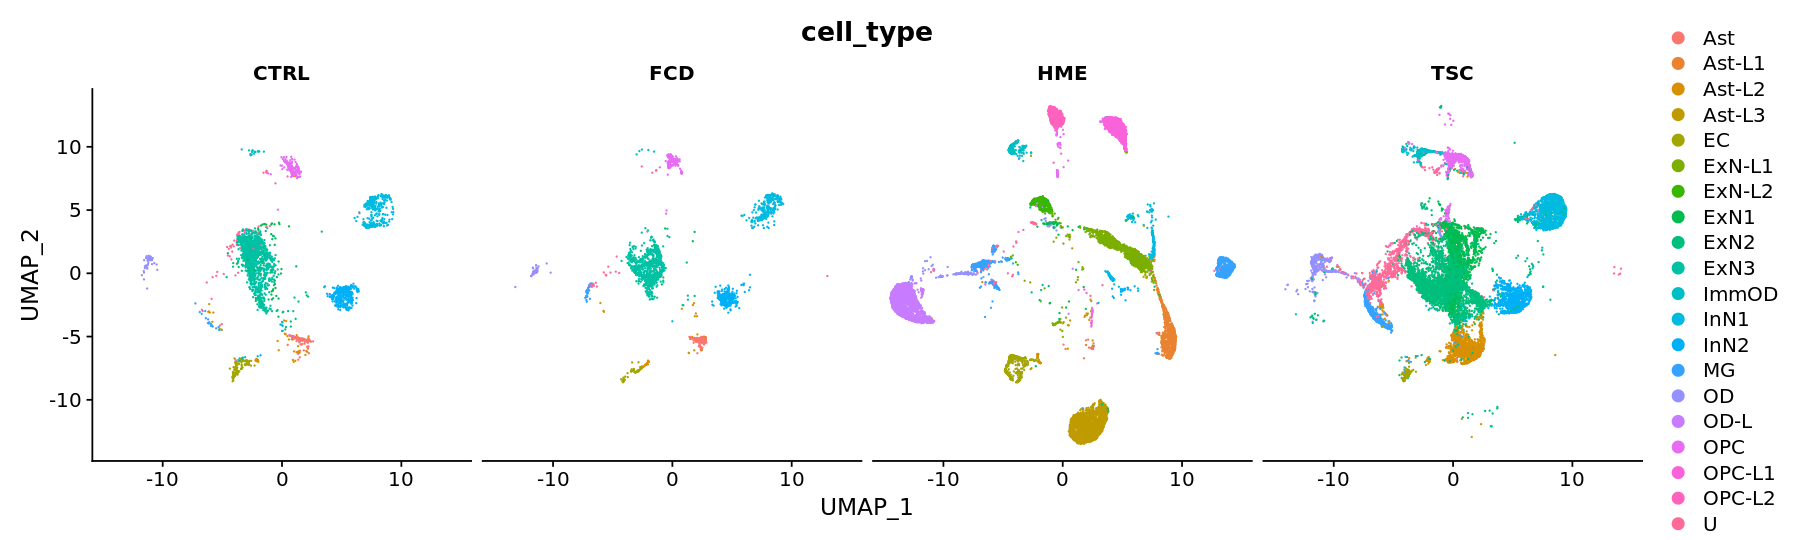

In [10]:
options(repr.plot.width=15, repr.plot.height=4.5)
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('cell_type'),
        split.by = c('disease'),
        label = F,
        pt.size = 0.01,
        label.size = 5)

In [11]:
pdf("Figure6b_UMAPs2.pdf",width=15, height=4.5)
options(repr.plot.width=15, repr.plot.height=4.5
       )
DimPlot(object = df0,
        ncol = 5, 
        reduction = "umap", 
        group.by = c('cell_type'),
        split.by = c('disease'),
        label = F,
        pt.size = 0.5,
        label.size = 5)
dev.off()

png 
  2

# Figure 6c

In [52]:
tmp <- table(df0@meta.data$cell_type, df0@meta.data$disease) 
tmp_col<-colSums(tmp)
len<-length(unique(df0@meta.data$cell_type))

In [53]:
tmp[1:len,1]<-tmp[1:len,1]/tmp_col[1]
tmp[1:len,2]<-tmp[1:len,2]/tmp_col[2]
tmp[1:len,3]<-tmp[1:len,3]/tmp_col[3]
tmp[1:len,4]<-tmp[1:len,4]/tmp_col[4]

In [54]:
tmp<-as.data.frame(tmp)
colnames(tmp) <- c('cell_type', 'disease','number')
tmp

cell_type disease number      
1  Ast       CTRL    0.032758013 
2  Ast-L1    CTRL    0.000000000 
3  Ast-L2    CTRL    0.020077492 
4  Ast-L3    CTRL    0.000000000 
5  EC        CTRL    0.049313138 
6  ExN-L1    CTRL    0.000000000 
7  ExN-L2    CTRL    0.000000000 
8  ExN1      CTRL    0.016202888 
9  ExN2      CTRL    0.019373019 
10 ExN3      CTRL    0.476928496 
11 ImmOD     CTRL    0.005635787 
12 InN1      CTRL    0.134906657 
13 InN2      CTRL    0.131736527 
14 MG        CTRL    0.005988024 
15 OD        CTRL    0.017259598 
16 OD-L      CTRL    0.000000000 
17 OPC       CTRL    0.068333920 
18 OPC-L1    CTRL    0.000000000 
19 OPC-L2    CTRL    0.000000000 
20 U         CTRL    0.021486439 
21 Ast       FCD     0.094958395 
22 Ast-L1    FCD     0.000000000 
23 Ast-L2    FCD     0.020558003 
24 Ast-L3    FCD     0.000000000 
25 EC        FCD     0.026921194 
26 ExN-L1    FCD     0.000000000 
27 ExN-L2    FCD     0.000000000 
28 ExN1      FCD     0.002936858 
29 ExN2      FCD     0.007831620 
30 ExN3      FCD     0.395496818 
⋮  ⋮         ⋮       ⋮           
51 ImmOD     HME     3.020300e-02
52 InN1      HME     2.731474e-02
53 InN2      HME     1.815481e-03
54 MG        HME     9.795346e-02
55 OD        HME     1.345106e-02
56 OD-L      HME     1.680145e-01
57 OPC       HME     8.334709e-03
58 OPC-L1    HME     8.433735e-02
59 OPC-L2    HME     6.279914e-02
60 U         HME     5.941575e-03
61 Ast       TSC     1.234111e-04
62 Ast-L1    TSC     0.000000e+00
63 Ast-L2    TSC     1.104529e-01
64 Ast-L3    TSC     0.000000e+00
65 EC        TSC     7.219548e-03
66 ExN-L1    TSC     0.000000e+00
67 ExN-L2    TSC     0.000000e+00
68 ExN1      TSC     2.180674e-01
69 ExN2      TSC     2.159694e-01
70 ExN3      TSC     4.319388e-04
71 ImmOD     TSC     2.313958e-02
72 InN1      TSC     1.075528e-01
73 InN2      TSC     6.762927e-02
74 MG        TSC     7.299766e-02
75 OD        TSC     4.504505e-02
76 OD-L      TSC     6.170554e-05
77 OPC       TSC     6.195236e-02
78 OPC-L1    TSC     0.000000e+00
79 OPC-L2    TSC     0.000000e+00
80 U         TSC     6.935703e-02

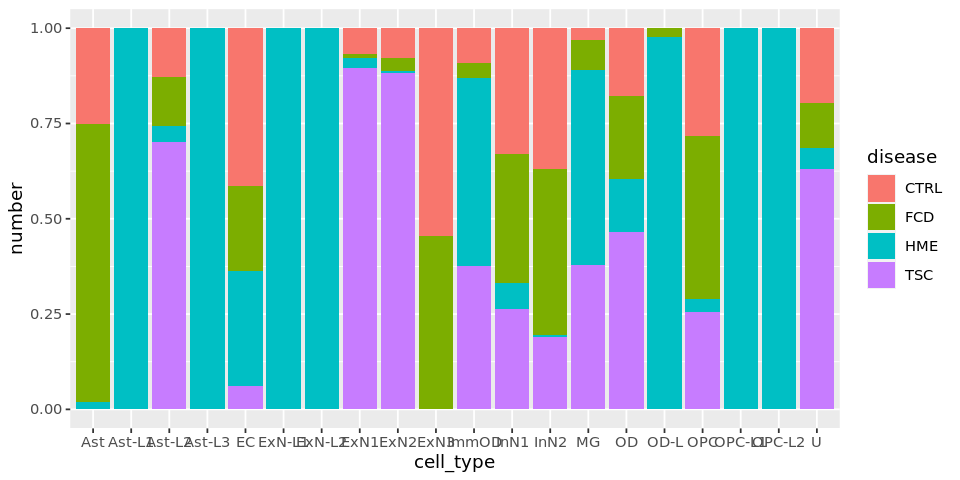

In [56]:
options(repr.plot.width=8, repr.plot.height=4)
ggplot(tmp, aes(fill=disease, y=number, x=cell_type)) + 
    geom_bar(position="fill", stat="identity")

In [58]:
pdf(file = "./Figure6c.pdf",
    width = 8, height = 4, useDingbats = F);
options(repr.plot.width=8, repr.plot.height=4)
ggplot(tmp, aes(fill=disease, y=number, x=cell_type)) + 
    geom_bar(position="fill", stat="identity")
dev.off()

png 
  2

# Figure 6d

In [12]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.01,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('SLC1A2','SYT1','GAD2','PTPRC','PLP1','ID1','FGFR1','FGFR2','FGFR3',
                                'EGFR','PDGFRA','APOE'))

Warning message in rm(plist):
“object 'plist' not found”


In [13]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 10,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for palette YlOrRd is 9
Returning the palette you asked for with that many colors
”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Warning message in RColorBrewer::brewer.pal(n = 10, name = "YlOrRd"):
“n too large, allowed maximum for pa

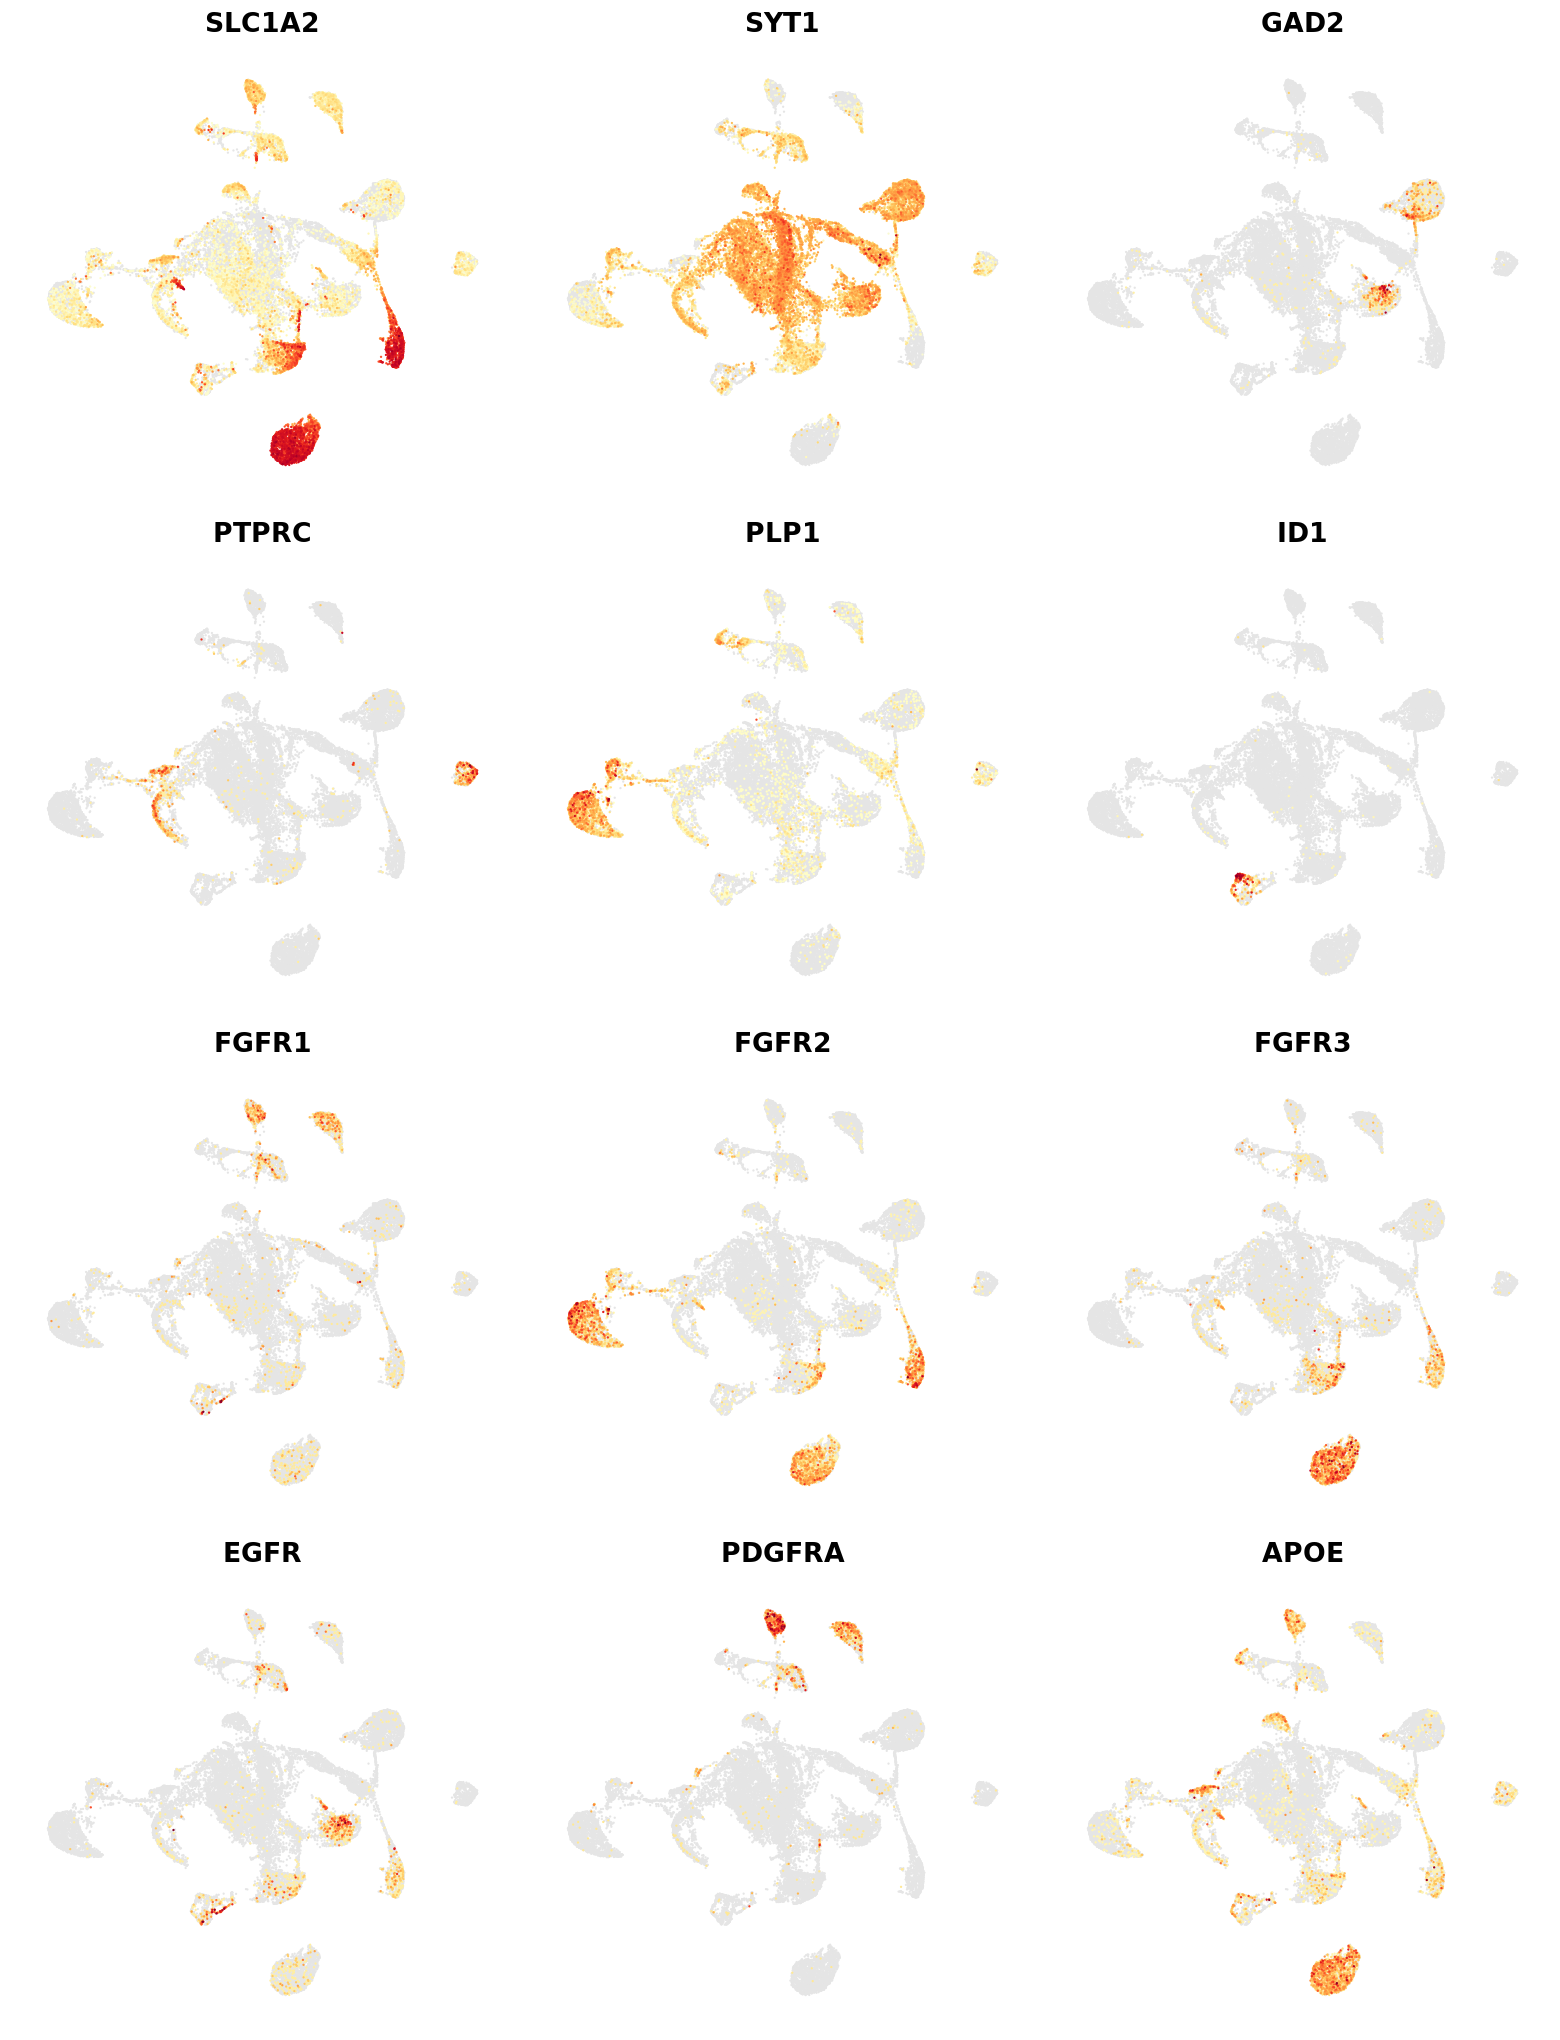

In [14]:
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)

In [16]:
pdf("Figure6d.pdf",width=13,height=17)
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

# Supplementary table 5a

In [26]:
Idents(df0) <- "cell_type"

In [27]:
plan(strategy = "multicore")
DEX <- FindAllMarkers(object = df0,
                      # min.diff.pct = 0.3,
                      slot = 'data',
                      #features = hvg,
                      return.thresh = 0.01,
                      min.pct = 0.1,
                      logfc.threshold = 0.25,
                      only.pos = TRUE,
                     verbose = FALSE)
plan(strategy = "sequential")

In [28]:
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)

In [29]:
DEX <- DEX[!(duplicated(DEX$gene)),]

In [30]:
top10 <- DEX %>%
    group_by(cluster) %>%
    top_n(n = 10, wt = diff.pct)

In [31]:
pdf(file = "./Extended_Data_Figure7a.pdf",
    width = 5, height = 4, useDingbats = F);
DoHeatmap(df0,
          disp.min = -1,
          disp.max = 1,
#           slot = 'data', 
          features = top10$gene,
          size = 2) + 
          scale_fill_gradientn(colors = c("#1b75bb", "black","#faaf40"))+
          theme(text = element_text(size = 3)) +
          NoLegend()
dev.off()

Warning message in DoHeatmap(df0, disp.min = -1, disp.max = 1, features = top10$gene, :
“The following features were omitted as they were not found in the scale.data slot for the SCT assay: FAM168A, PACS1, IQCA1, PPP1R12A, CNNM2, BTRC, ATP2B4, DROSHA, MTCH2, SLC25A27, MYH14, CHCHD6, UPK3B, COLQ, AACS, FBXL2, LRRC37A2, SHANK1, MPP7, FAM153A, LRRK2, C3orf70, SDC3, COL9A3, SPRY4, ECHDC2, AIFM3, TTYH1, AKAP8L, C2orf15, KLHL22, LHFPL4, SULT1A1, BRSK2, PKD1, YPEL1, LGI4, LTBP4, PPP2R3A, JPH4, SYT7, CSMD2, SCN3A, DYNC1I1, NAP1L1, DYNC1H1, THY1, MTCH1, STMN1, SRSF11, SEC62, AHCYL1”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



png 
  2

In [32]:
write.csv(DEX, "Supplementary_Table_5a.csv")

# Supplementary table 5b

In [4]:
DefaultAssay(df0) <- "SCT"

In [6]:
hvg <- VariableFeatures(df0)

In [7]:
options(stringsAsFactors = F)
rExpr <- t( as.matrix(df0@assays$SCT@scale.data[hvg,] ))  # only use variable genes in analysis

In [8]:
rExpr

ABCB1       FLT1         SLC1A2      ADARB2     
CTRL_AAACCCACAAATGGAT-1 -1.97159011 -2.10407600   1.08048514 -3.962925  
CTRL_AAACCCAGTTGTAGCT-1 -2.06859847 -2.13111077  -0.42251123 -3.995643  
CTRL_AAACCCATCGAAGCAG-1 -2.15756045 -2.16030804  -0.55013506 -3.894664  
CTRL_AAACGAAAGCTTTCCC-1 -1.66191746 -1.69997105  -1.48553862 14.265464  
CTRL_AAACGAAAGGTTCTAC-1  0.81258853  0.36894923   1.13866946 -1.241646  
CTRL_AAACGAACAGTTCCAA-1  0.54038425  0.14072528  -0.52423280 -1.771076  
CTRL_AAACGAAGTATTCTCT-1 -0.75315553  5.17259946  -1.55991683 20.442499  
CTRL_AAACGAAGTTTAGACC-1  0.94215514  0.47544526  -0.85164278 -1.036701  
CTRL_AAACGAATCTGAGATC-1 -1.46252811 -1.52138231  -1.15325599 -3.875374  
CTRL_AAACGCTTCGAAGAAT-1 -1.35084092 -1.45987938  -1.11537124 21.789060  
CTRL_AAAGAACCACGACTAT-1 -0.73247391 -0.87973479  -1.94469638 -3.947727  
CTRL_AAAGAACCAGGTACGA-1  0.08274101 -0.28960757   1.27663035 -1.651005  
CTRL_AAAGGATCACTACTTT-1  2.12019223  1.50902385   9.06956327 -1.724589  
CTRL_AAAGGATGTCAGTTTG-1 -1.11401159 -1.24163545  -1.54203382 -3.939531  
CTRL_AAAGGGCCAATCAAGA-1 -0.72188528 -0.89377809  -1.77852623 -3.978367  
CTRL_AAAGTGAGTTCACCGG-1  0.28553367 20.52755991   1.63946268 -3.711348  
CTRL_AAAGTGATCCATACAG-1 -0.67559397 -0.95896116   1.14971904 -3.922952  
CTRL_AAATGGAGTTAGCGGA-1 -0.63972974 -0.86074417  -1.23170007 -3.990593  
CTRL_AAATGGAGTTCTTGCC-1 -0.53769233 -1.34631765  -0.61547646 -3.420580  
CTRL_AAATGGATCATATGGC-1 -2.32857226 -2.31003983  -0.35296597 -3.906007  
CTRL_AACAACCAGCGTATGG-1  1.75038556  1.20045221  -1.54251952 -3.881137  
CTRL_AACAAGATCACGATCA-1 -0.93999418 -1.15290752  -0.04285741 -2.617239  
CTRL_AACAAGATCCTTCAGC-1 -3.08413048 -2.95924965  -0.11000456 -3.800537  
CTRL_AACAGGGCATTACGGT-1  0.29775511 -0.01375786  -1.19985546 -3.975554  
CTRL_AACCAACTCGCAGATT-1  1.30968221  0.83154017   8.11698705 -2.632387  
CTRL_AACCACAAGGACAGTC-1  1.54798804  1.00101155  -0.91400580 -2.063068  
CTRL_AACCACACACAGAAGC-1 -1.41526954 -1.47956081  -1.40486952 -3.867786  
CTRL_AACCATGAGTGTGTTC-1  0.17823167 -0.18001167  -0.88172014  2.355669  
CTRL_AACCATGCATGGAAGC-1  3.58511910 -0.85578497  -0.96104828 -3.986759  
CTRL_AACCATGGTGGTCCCA-1  1.21733657  0.71751737   2.14793265 -3.798927  
⋮                       ⋮           ⋮            ⋮           ⋮          
4259_TTTGACTGTCCAGGTC-1 -0.70060459 -0.454020106 -1.2428758  12.94835677
4259_TTTGACTGTCTGTCCT-1 -0.11928603 -0.034679881 -1.0250669   2.90958102
4259_TTTGACTTCGTCAACA-1 -0.16520251 -0.058928403  6.4051230   2.38797221
4259_TTTGATCTCACTAGCA-1 -1.16155503  4.222554358  0.2280647  -0.37732474
4259_TTTGATCTCATGACAC-1 -0.25438010 -0.186571060 -0.3635303   0.02784442
4259_TTTGATCTCCCTCGTA-1 -0.56293399 -0.441324659 -0.5864487  -0.48235383
4259_TTTGATCTCGCATGAT-1 -0.25028491 -0.176022739 -0.5312953   1.65397741
4259_TTTGGAGAGGACAAGA-1 -0.09311860 -0.018902883  0.1200847  -0.39691325
4259_TTTGGAGCAACATACC-1 -0.34404881 -0.247395137  2.3122512   1.33518144
4259_TTTGGAGCAAGTCCCG-1 -0.82131543 -0.573327292 -1.2071661  -2.41513712
4259_TTTGGAGCACTACCCT-1 -0.24136217 -0.090980081 -1.8668492  -2.33194947
4259_TTTGGAGCAGTTGAAA-1 -0.38310843 -0.300432541  6.5885839  -2.16358454
4259_TTTGGAGGTCCCGTGA-1 -0.36271426 -0.221225804 -0.7406780  -0.98876320
4259_TTTGGAGTCACGAGGA-1 -0.71689593 -0.601341791 -0.1062720  -2.17333337
4259_TTTGGAGTCAGCAGAG-1 -0.08892149  0.023518895 -0.7887000  -0.83403510
4259_TTTGGAGTCGGCTTGG-1  0.03940805  0.106034699 -1.0897203  -0.42704136
4259_TTTGGTTAGAGAGTGA-1  0.06001907  0.106312045  0.4359410   1.97750901
4259_TTTGGTTAGCTTGTTG-1  0.09568085  0.155908492 -1.0877448  -0.29919601
4259_TTTGGTTCAGGTCTCG-1 -0.02751492  0.107243960 -2.1365958   6.96471602
4259_TTTGGTTCATTCTCCG-1 -1.92855383 23.620974773 -0.8442512   1.77712164
4259_TTTGGTTCATTGCTGA-1 -0.11075337  0.003625013 -1.5588031  -2.28130851
4259_TTTGGTTGTATATGGA-1 -0.21489367 -0.122014788  1.0465299  -2.21397707
4259_TTTGGTTGTATGTCAC-1  0.18954736  0.250332938  3.6930967   1.34096939
4259_TTTG

In [21]:
rExpr

ABCB1         FLT1         SLC1A2       ADARB2     
CTRL_AAACCCACAAATGGAT-1 -0.5337880098 -0.61819116   0.141556293 -0.82872008
CTRL_AAACCCAGTTGTAGCT-1 -0.5590707111 -0.60949240  -0.572254533 -0.78723893
CTRL_AAACCCATCGAAGCAG-1 -0.5683111886 -0.58225815  -0.415539420 -0.68401653
CTRL_AAACGAAAGCTTTCCC-1 -0.4456150213 -0.45721168  -0.451853820  3.02393310
CTRL_AAACGAAAGGTTCTAC-1  0.1587634939  0.03113038   1.141573640  0.85078010
CTRL_AAACGAACAGTTCCAA-1  0.0943722335 -0.02184667  -0.046471749  0.50251164
CTRL_AAACGAAGTATTCTCT-1 -0.2267806262  2.73834447  -0.656303678  3.30779260
CTRL_AAACGAAGTTTAGACC-1  0.1913723103  0.05738631  -0.856419050  0.84500780
CTRL_AAACGAATCTGAGATC-1 -0.3909486619 -0.40261490   0.334194083 -0.67543808
CTRL_AAACGCTTCGAAGAAT-1 -0.3750046493 -0.41719428  -0.587728914  3.38474886
CTRL_AAAGAACCACGACTAT-1 -0.2085159399 -0.23897795  -0.547714336 -0.72905784
CTRL_AAAGAACCAGGTACGA-1 -0.0208141576 -0.14259385   0.991207995  0.50114370
CTRL_AAAGGATCACTACTTT-1  0.4853463007  0.32741598   2.535973097  0.45562351
CTRL_AAAGGATGTCAGTTTG-1 -0.3018137617 -0.33828861  -0.526363037 -0.72865871
CTRL_AAAGGGCCAATCAAGA-1 -0.2075547751 -0.25305790  -0.595229488 -0.76201594
CTRL_AAAGTGAGTTCACCGG-1  0.0264654167  5.58603083   0.704037361 -0.91688739
CTRL_AAAGTGATCCATACAG-1 -0.2076194625 -0.31530455   0.807135556 -0.86275436
CTRL_AAATGGAGTTAGCGGA-1 -0.1958157087 -0.26782906  -0.681212052 -0.82035082
CTRL_AAATGGAGTTCTTGCC-1 -0.3050319001 -0.31429999  -0.139410481 -0.49493441
CTRL_AAATGGATCATATGGC-1 -0.6141985734 -0.62518285   0.354753642 -0.68659790
CTRL_AACAACCAGCGTATGG-1  0.4126135545  0.27146387  -0.887157612 -0.90155301
CTRL_AACAAGATCACGATCA-1 -0.2727153983 -0.35415222   0.088096403  0.04330167
CTRL_AACAAGATCCTTCAGC-1 -0.8064379839 -0.78898176   0.495253561 -0.61483844
CTRL_AACAGGGCATTACGGT-1  0.0332911937 -0.04688893   0.004361328 -0.84736846
CTRL_AACCAACTCGCAGATT-1  0.2853282790  0.16127633   2.505702268 -0.02352209
CTRL_AACCACAAGGACAGTC-1  0.3431937527  0.19381088  -0.132835703  0.46625941
CTRL_AACCACACACAGAAGC-1 -0.3780352727 -0.39004280  -0.431027686 -0.67239695
CTRL_AACCATGAGTGTGTTC-1  0.0009856257 -0.10947413  -0.791999827  1.57722462
CTRL_AACCATGCATGGAAGC-1  1.5261456189 -0.27255297  -0.695287061 -0.82865034
CTRL_AACCATGGTGGTCCCA-1  0.2620144635  0.12281433   1.430746205 -0.90914165
⋮                       ⋮             ⋮            ⋮            ⋮          
4259_TTTGACTGTCCAGGTC-1 -0.213458905  -0.114360330  0.2636688    2.72725790
4259_TTTGACTGTCTGTCCT-1 -0.074004698  -0.034656950 -0.2762236    1.54782128
4259_TTTGACTTCGTCAACA-1 -0.085740422  -0.037270280  2.1036963    1.35987076
4259_TTTGATCTCACTAGCA-1 -0.336087585   2.717289943 -0.2196998    0.48141878
4259_TTTGATCTCATGACAC-1 -0.110516418  -0.085469808 -0.2769277    0.83220041
4259_TTTGATCTCCCTCGTA-1 -0.186556776  -0.147150986 -0.2512826    0.48140770
4259_TTTGATCTCGCATGAT-1 -0.106477658  -0.077921604 -0.2738071    1.11728632
4259_TTTGGAGAGGACAAGA-1 -0.067600544  -0.032447604  0.4883108    0.47560538
4259_TTTGGAGCAACATACC-1 -0.130562087  -0.094586025  1.2716920    1.12258837
4259_TTTGGAGCAAGTCCCG-1 -0.248627307  -0.154661991  0.2567188   -0.85728088
4259_TTTGGAGCACTACCCT-1 -0.104250032  -0.036286889 -1.0190774   -0.88535921
4259_TTTGGAGCAGTTGAAA-1 -0.141065040  -0.113864466  2.0375696   -0.91397407
4259_TTTGGAGGTCCCGTGA-1 -0.133044523  -0.074778461  0.2008518   -0.01611404
4259_TTTGGAGTCACGAGGA-1 -0.225237326  -0.195419120 -0.2471829   -0.91002500
4259_TTTGGAGTCAGCAGAG-1 -0.066575817  -0.011695343  0.1803297    0.48931293
4259_TTTGGAGTCGGCTTGG-1 -0.034437560   0.002448743 -0.2869367    0.47572249
4259_TTTGGTTAGAGAGTGA-1 -0.030514747  -0.003124901  0.4748641    1.34344196
4259_TTTGGTTAGCTTGTTG-1 -0.022204485   0.013748943 -0.2919614    0.47374677
4259_TTTGGTTCAGGTCTCG-1 -0.047761373   0.021482903 -1.0273091    2.14191114
4259_TTTGGTTCATTCTCCG-1 -0.533350869   5.624044021  0.3323398    1.19533255
4259_TTTGGTTCATTGCTGA-1 -0.072070601  -0.017125397 -1.0361940   -0.89671

In [9]:
powers = c(seq(from = 1, to=20, by=1))

In [10]:
sft <- pickSoftThreshold(rExpr, 
                         powerVector = powers, 
                         verbose = 0,
                         corFnc = "cor",
                         corOptions = list(method="p"),
                         networkType = "signed hybrid")

Warning message:
“executing %dopar% sequentially: no parallel backend registered”


   Power SFT.R.sq slope truncated.R.sq  mean.k. median.k.   max.k.
1      1    0.786 -1.38          0.988 6.49e+01  5.25e+01 251.0000
2      2    0.941 -1.55          0.962 1.10e+01  5.50e+00  94.3000
3      3    0.971 -1.49          0.970 3.09e+00  7.70e-01  46.4000
4      4    0.980 -1.43          0.980 1.13e+00  1.35e-01  26.3000
5      5    0.967 -1.39          0.964 4.88e-01  2.57e-02  16.0000
6      6    0.969 -1.34          0.965 2.36e-01  5.33e-03  10.1000
7      7    0.970 -1.30          0.970 1.24e-01  1.16e-03   6.6600
8      8    0.940 -1.27          0.927 6.88e-02  2.63e-04   4.4800
9      9    0.974 -1.24          0.981 4.01e-02  6.20e-05   3.0700
10    10    0.959 -1.21          0.967 2.42e-02  1.51e-05   2.1400
11    11    0.959 -1.20          0.959 1.51e-02  3.80e-06   1.5100
12    12    0.969 -1.19          0.966 9.60e-03  9.75e-07   1.0800
13    13    0.967 -1.19          0.962 6.25e-03  2.54e-07   0.7740
14    14    0.337 -1.58          0.195 4.14e-03  6.83e-08   0.

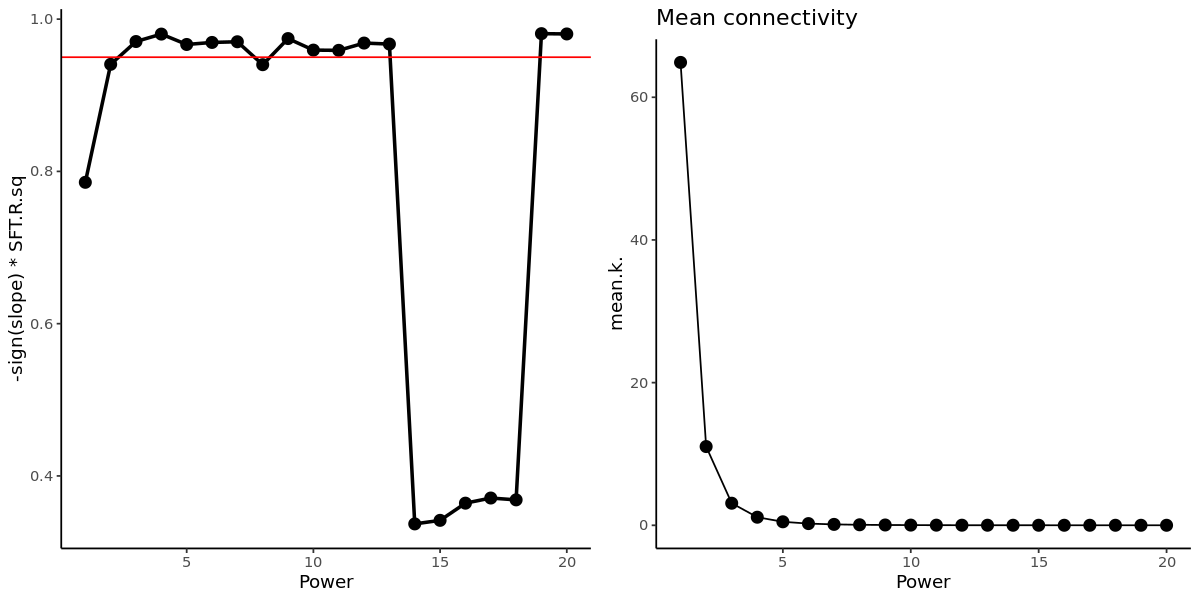

In [11]:
options(repr.plot.width = 10, repr.plot.height = 5)

g1 <- ggplot(data = sft$fitIndices, aes(x = Power, y = -sign(slope)*SFT.R.sq)) +
  geom_point(size = 3) +
  geom_line(size = 1) +
  geom_hline(aes(yintercept = 0.95), colour = "red") +
    theme_classic()

g2 <- ggplot(data = sft$fitIndices, aes(x = Power, y = mean.k.)) +
  geom_point(size = 3) +
  geom_line(size = 0.5) +
  ggtitle(label = "Mean connectivity") +
    theme_classic()

gridExtra::grid.arrange(g1, g2, ncol = 2)

In [12]:
softPower = 3

In [13]:
plan(strategy = "multicore")
cor <- cor(rExpr, method = "p")
plan(strategy = "sequential")

In [14]:
plan(strategy = "multicore")
cor  <- cosine(rExpr)
plan(strategy = "sequential")

In [22]:
dir.create("WGCNA")
write.csv(cor, "./WGCNA/correlation.csv")

Warning message in dir.create("WGCNA"):
“'WGCNA' already exists”


In [15]:
head(cor)

ABCB1       FLT1        SLC1A2      ADARB2      ST18        
ABCB1   1.00000000  0.81533575 -0.13773050 -0.03593899 -0.024918530
FLT1    0.81533575  1.00000000 -0.12548271 -0.03668624 -0.024139271
SLC1A2 -0.13773050 -0.12548271  1.00000000 -0.09507363 -0.173006041
ADARB2 -0.03593899 -0.03668624 -0.09507363  1.00000000  0.005605460
ST18   -0.02491853 -0.02413927 -0.17300604  0.00560546  1.000000000
ATP10A  0.77832050  0.77312034 -0.13184583 -0.04238364 -0.001017148
       ATP10A       GPC5        ITM2A       LHFPL3      HSPA1B       ⋯
ABCB1   0.778320498 -0.12065662  0.69456842 -0.05520150  0.039529217 ⋯
FLT1    0.773120337 -0.10406798  0.66031758 -0.05276546  0.018170014 ⋯
SLC1A2 -0.131845829  0.78328548 -0.14497940 -0.23255916 -0.003823098 ⋯
ADARB2 -0.042383635 -0.09043854 -0.02259851  0.07881471 -0.049650839 ⋯
ST18   -0.001017148 -0.20137319  0.01655824 -0.15068847 -0.014945701 ⋯
ATP10A  1.000000000 -0.11246724  0.65422042 -0.04880206  0.010824809 ⋯
       DHRS13        TSPAN1        CDKN2D        CPNE2       PGLYRP1      
ABCB1  -0.0028196946  7.528814e-04 -3.504621e-02  0.07970743  0.0015184688
FLT1    0.0008085775  3.617277e-03 -4.772620e-02  0.07969729  0.0005779445
SLC1A2  0.0010050239 -6.602425e-03 -2.189534e-02 -0.07659550 -0.0014387162
ADARB2  0.0185387427 -6.133475e-03 -2.796783e-02  0.06351549  0.0024164452
ST18    0.0029618008 -5.019451e-05 -2.085942e-05  0.23680449  0.0087848523
ATP10A -0.0049487780  1.164090e-03 -4.362101e-02  0.08915877 -0.0023937714
       NOS3         SLC30A1      KCNJ6       ESCO2        MAPK12     
ABCB1   0.405594337  0.399129868 -0.07654876  0.006082601  0.03141738
FLT1    0.371660906  0.388403895 -0.09290757  0.003890047  0.03074343
SLC1A2 -0.072086761 -0.065592097 -0.13813512 -0.010974831  0.07142806
ADARB2 -0.015765695 -0.017036068 -0.02484000  0.010842337 -0.02256266
ST18   -0.007053728  0.001487257 -0.05916233  0.001351157 -0.04152770
ATP10A  0.335309292  0.408588756 -0.08113512  0.006990548  0.02054213

# Extended Data Fig. 7b

In [16]:
adj = adjacency.fromSimilarity(cor, type = "signed hybrid", power = 3)

In [17]:
TOM = TOMsimilarity(adj, TOMDenom = "mean")

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [18]:
colnames(TOM) <- rownames(TOM) <- colnames(rExpr)
dissTOM <- 1 - TOM
geneTree <- hclust(as.dist(dissTOM), method="average");

In [19]:
# Set the minimum module size
minModuleSize = 30;
# Module identification using dynamic tree cut
dynamicMods = cutreeDynamic(dendro = geneTree,
                            cutHeight = 0.999,
                            method="hybrid",
                            deepSplit = 4,
#                             minAbsSplitHeight = 0.995,
                            minClusterSize = minModuleSize,
                            distM = dissTOM);

 ..done.


In [20]:
dynamicColors = labels2colors(dynamicMods)

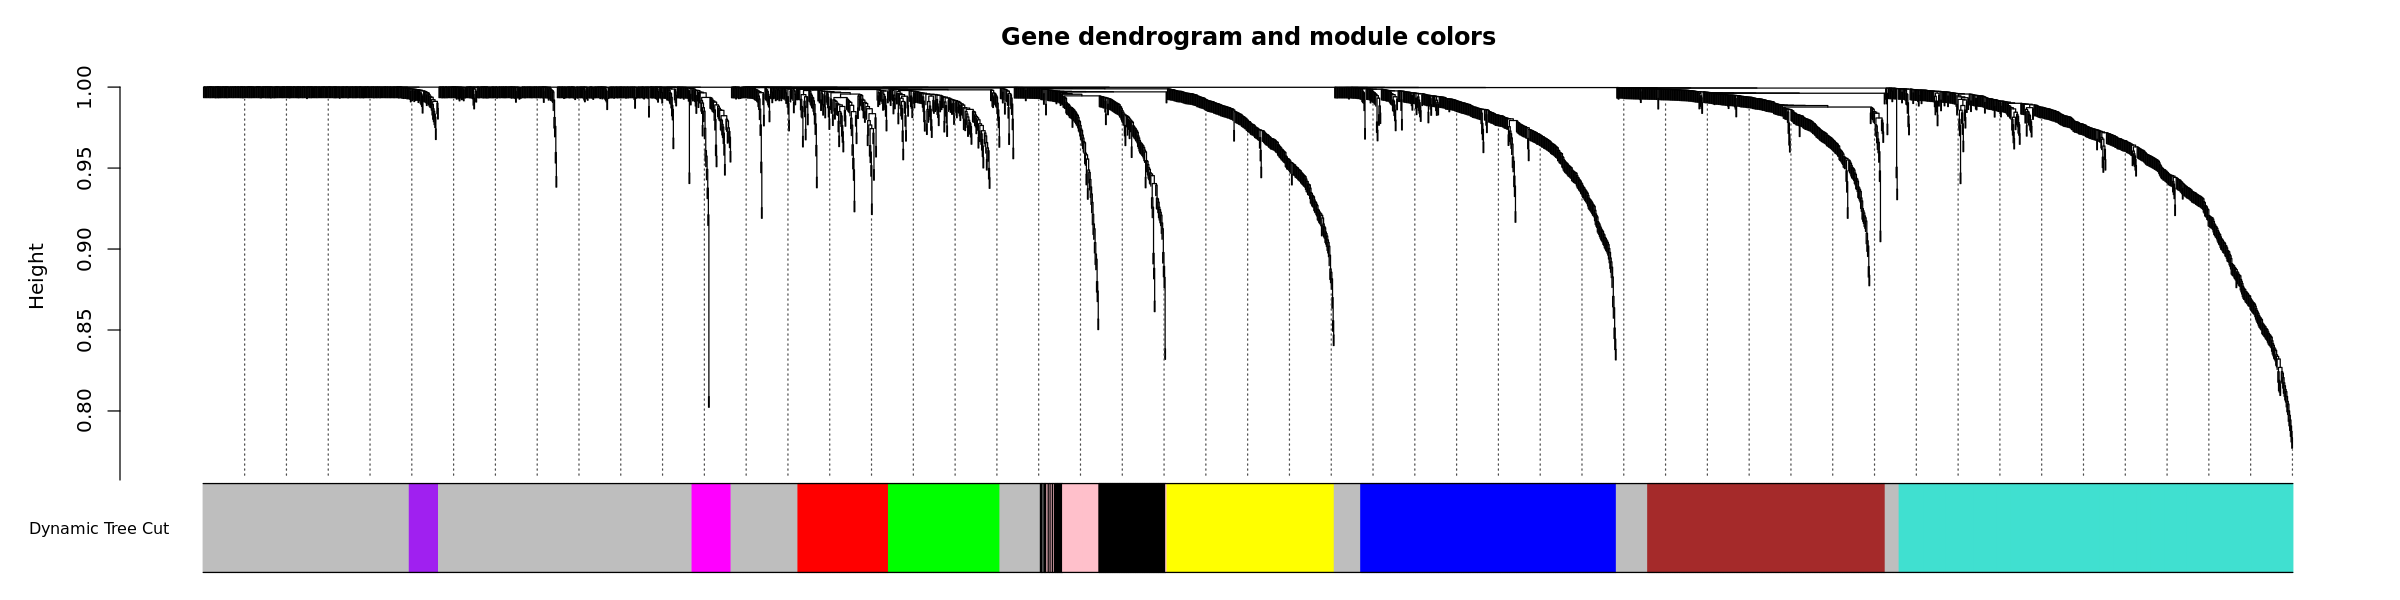

In [23]:
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.03, 
                    main = "Gene dendrogram and module colors")

In [24]:
pdf("Extended_Data_Figure7b.pdf",width=20, height=5)
#table(dynamicColors)
options(repr.plot.width=20, repr.plot.height=5)
plotDendroAndColors(geneTree, 
                    dynamicColors, 
                    "Dynamic Tree Cut", 
                    dendroLabels = FALSE, 
                     hang = 0.03, 
                    addGuide = TRUE, 
                    guideHang = 0.03, 
                    main = "Gene dendrogram and module colors")
dev.off()

png 
  2

# Extended Data Fig. 7c

In [25]:
sort(unique(dynamicColors))

[1] "black"     "blue"      "brown"     "green"     "grey"      "magenta"  
 [7] "pink"      "purple"    "red"       "turquoise" "yellow"

In [26]:
unique(dynamicColors)

[1] "turquoise" "blue"      "red"       "yellow"    "black"     "magenta"  
 [7] "brown"     "pink"      "grey"      "green"     "purple"

In [27]:
MEs <- moduleEigengenes(as.matrix(rExpr), dynamicColors)
MEs <- orderMEs(MEs$eigengenes)

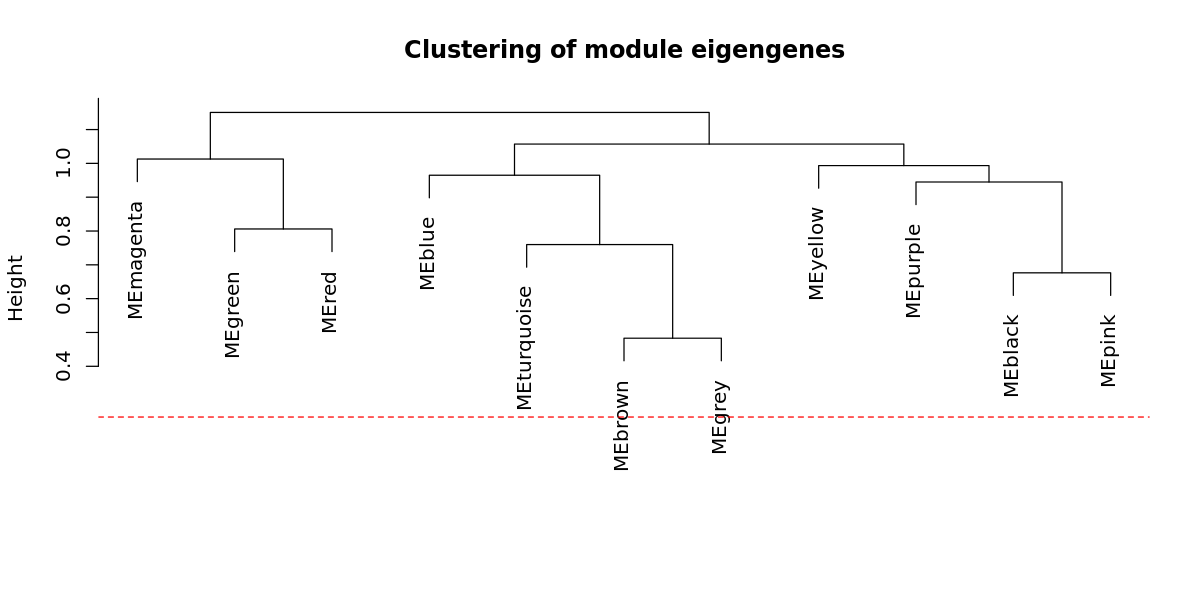

In [28]:
## Merge similar modules
options(repr.plot.width = 10, repr.plot.height = 5)
MEDiss = 1-cor(MEs)
METree = hclust(as.dist(MEDiss), method = "average")
plot(METree, main = "Clustering of module eigengenes", xlab = "", sub = "")
MEDissThres = 0.25
abline(h=MEDissThres, col = "red", lty = 2)

In [29]:
merge <- mergeCloseModules(rExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
MEs2 <- merge$newMEs
dynamicColors2 <- merge$colors

 mergeCloseModules: Merging modules whose distance is less than 0.25
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 11 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 11 module eigengenes in given set.


In [30]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(MEs2, as.numeric(h), use = "p") # use merged MEs
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(rExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

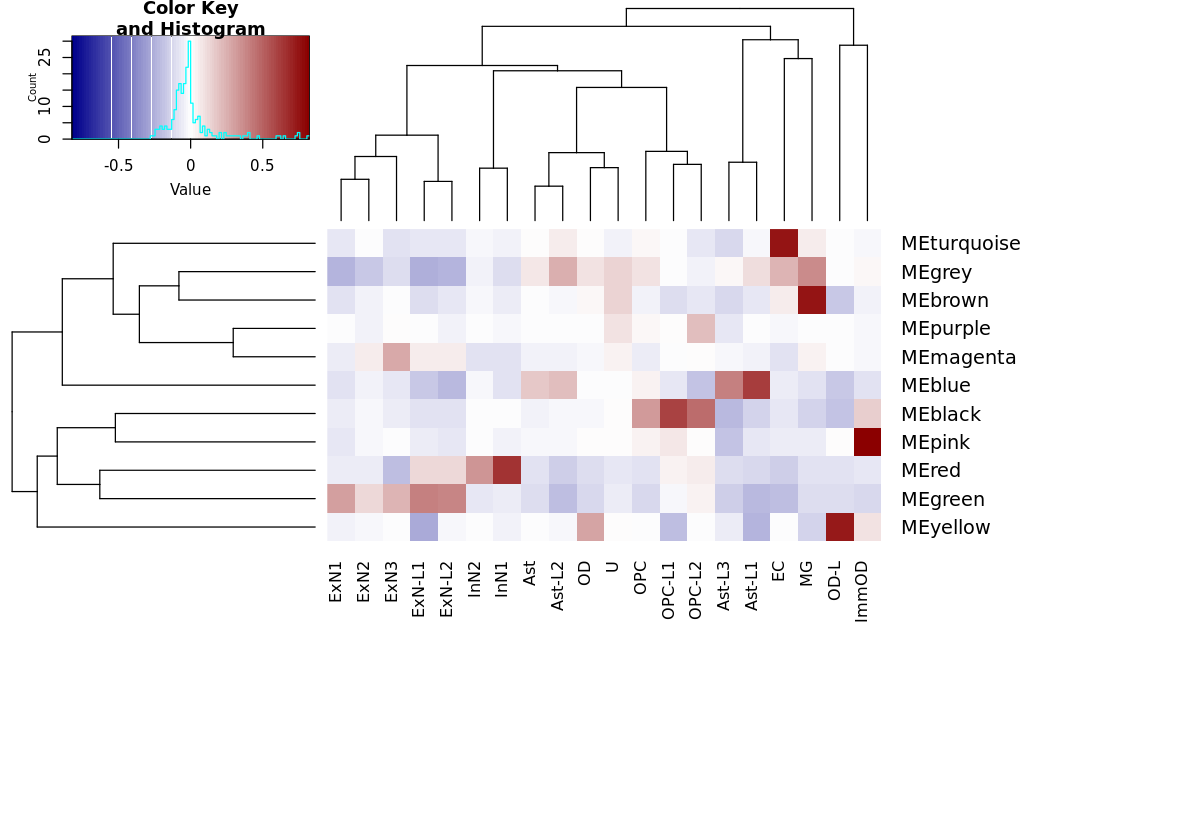

In [31]:
options(repr.plot.width = 10, repr.plot.height = 7)
heatmap.2(moduleTraitCor,scale="none",trace="none",
          col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) )

In [32]:
pdf("Extended_Data_Fig7c_dendrogram.pdf",width=10, height=7)
heatmap.2(moduleTraitCor,scale="none",trace="none",
          col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) )
dev.off()

png 
  2

In [33]:
res <- reshape2::melt(moduleTraitPvalue)

In [34]:
sort(unique(res$Var2))

[1] Ast    Ast-L1 Ast-L2 Ast-L3 EC     ExN-L1 ExN-L2 ExN1   ExN2   ExN3  
[11] ImmOD  InN1   InN2   MG     OD     OD-L   OPC    OPC-L1 OPC-L2 U     
20 Levels: Ast Ast-L1 Ast-L2 Ast-L3 EC ExN-L1 ExN-L2 ExN1 ExN2 ExN3 ... U

In [35]:
to.plot <- reshape2::melt(moduleTraitCor)

In [36]:
to.plot$p_value <- res$value

In [37]:
#to.plot$value[to.plot$value <= 0] <- NA

In [38]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = sort(unique(res$Var2)))
                  #     levels = c('CTRL','FCD',
                   #               'HME','TSC'))

In [39]:
unique(to.plot$Var1)

[1] MEblue      MEmagenta   MEgreen     MEred       MEbrown     MEturquoise
 [7] MEyellow    MEpurple    MEblack     MEpink      MEgrey     
11 Levels: MEblue MEmagenta MEgreen MEred MEbrown MEturquoise ... MEgrey

In [40]:
cell_type_modules = unique(to.plot$Var1)

Warning message:
“Removed 155 rows containing missing values (geom_point).”


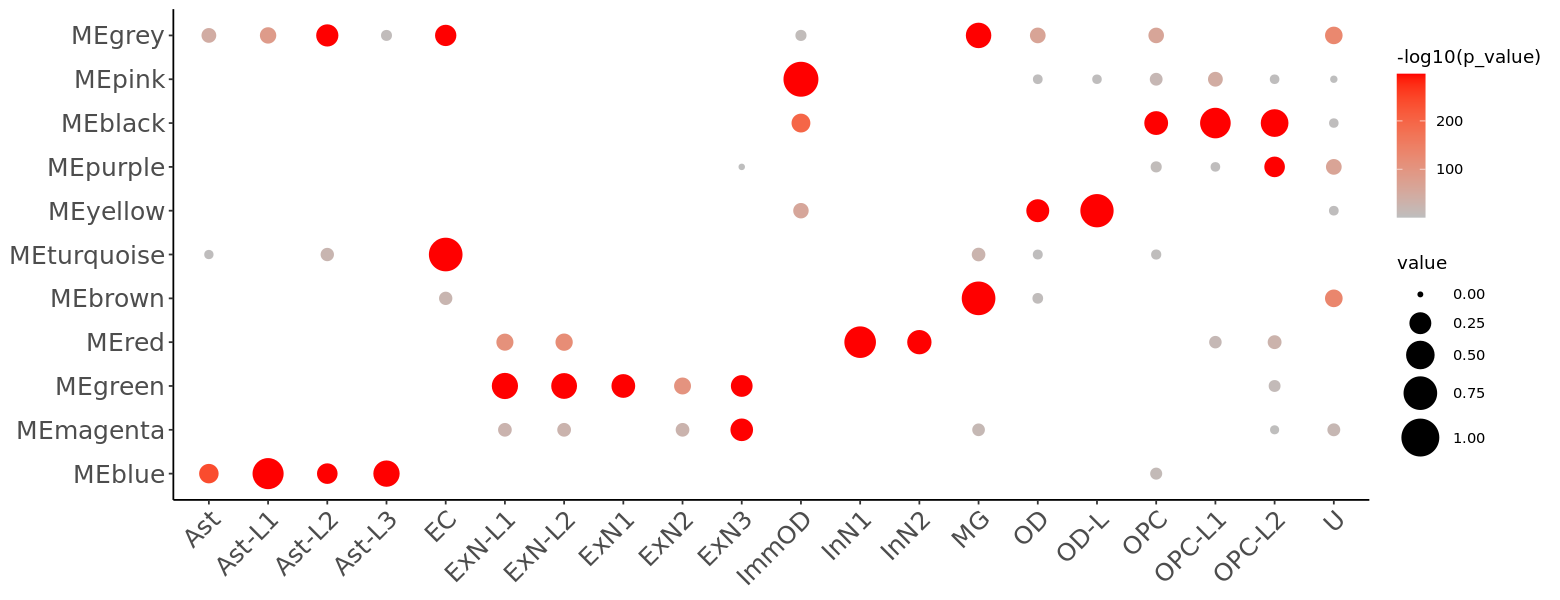

In [41]:
options(repr.plot.width = 13, repr.plot.height = 5)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo
#blue synapse neuron
#black interneuron
#green yellow : collagen
#magenta: EGFR
#purple: microglia immune

In [42]:
pdf("Extended_Data_Fig7c_dotplot.pdf",width=13, height=5)
options(repr.plot.width = 13, repr.plot.height = 11)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 155 rows containing missing values (geom_point).”


png 
  2

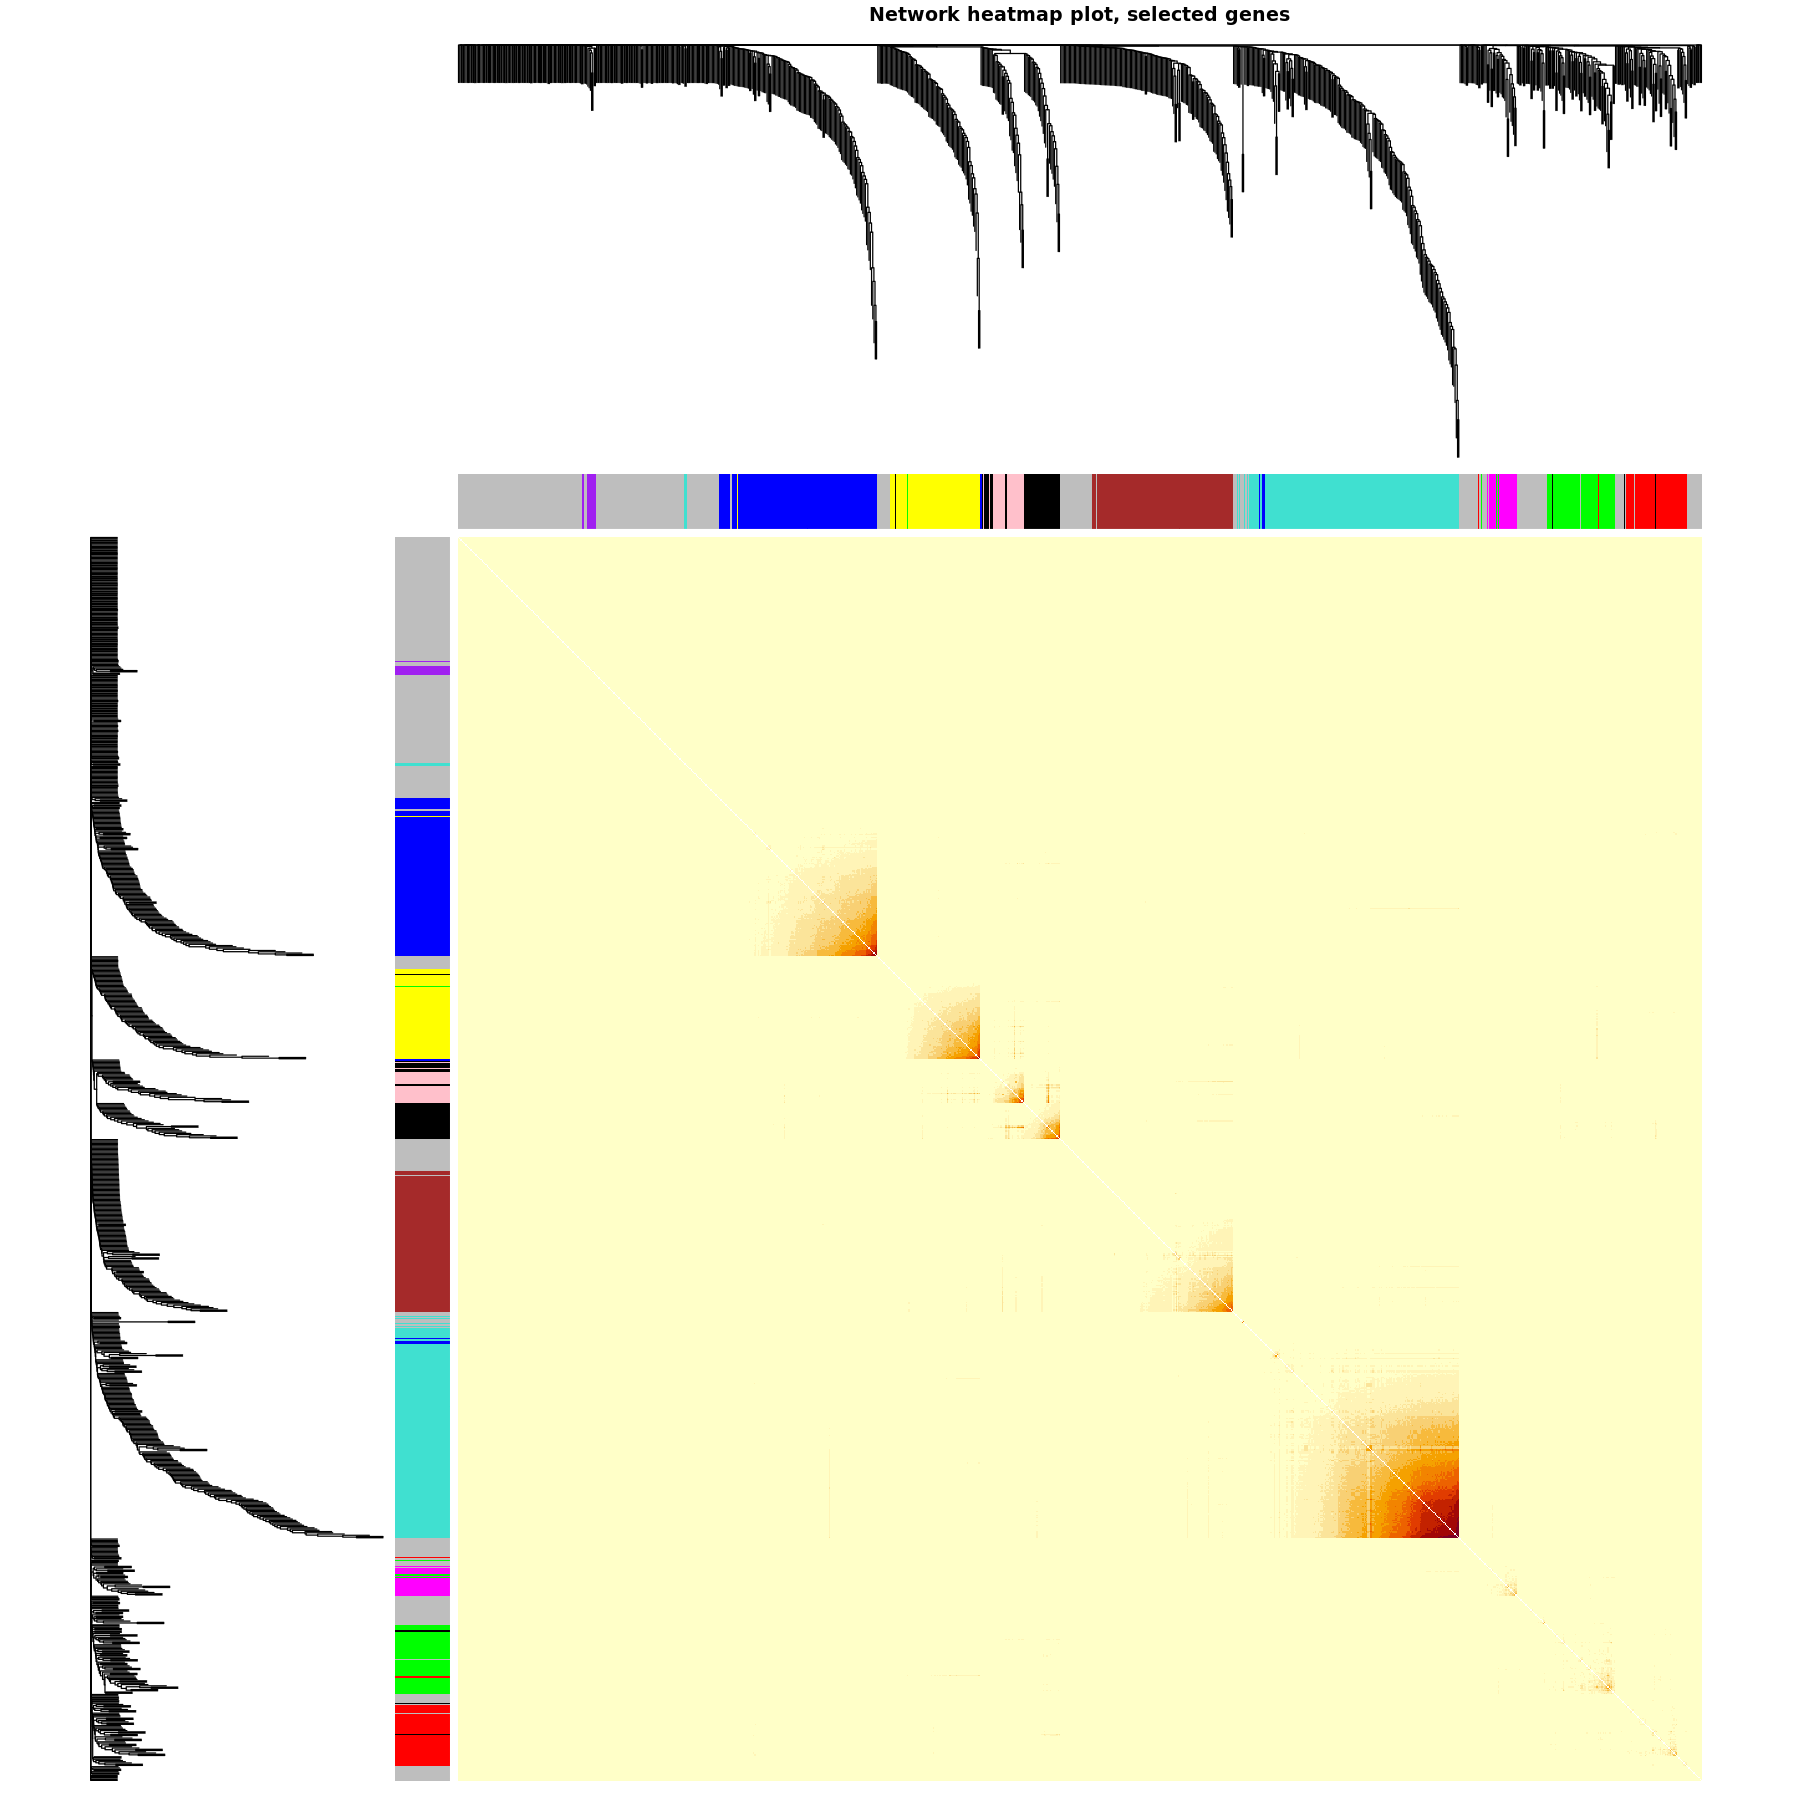

In [43]:
options(repr.plot.width = 15, repr.plot.height = 15)
nSelect = 1000
nGenes <- ncol(rExpr)
nSamples <- nrow(rExpr)

# For reproducibility, we set the random seed
set.seed(10);
select <- sample(nGenes, size = nSelect);
selectTOM <-dissTOM[select, select];
# There’s no simple way of restricting a clustering tree to a subset of genes, so we must re-cluster.
selectTree <- hclust(as.dist(selectTOM), method = "average")
selectColors <- dynamicColors2[select];
# Open a graphical window
# Taking the dissimilarity to a power, say 10, makes the plot more informative by effectively changing
# the color palette; setting the diagonal to NA also improves the clarity of the plot
plotDiss <- 1-selectTOM^10;
diag(plotDiss) <- NA;
TOMplot(plotDiss, selectTree, selectColors, main = "Network heatmap plot, selected genes")

In [44]:
Genelist <- as.data.frame(dynamicColors2, col.names = "Gene", row.names =row.names(TOM))

In [45]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [46]:
lapply(unique(dynamicColors2), function(xx){
a <- subset(Genelist, Genelist$dynamicColors2==xx)
write.csv(a, paste("./WGCNA/",xx,"_geneset.csv"))
})

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

[[7]]
NULL

[[8]]
NULL

[[9]]
NULL

[[10]]
NULL

[[11]]
NULL

# Extended Data Fig. 9

In [48]:
genelist<-read.csv("../FCD_gene_list.csv",header=TRUE)

In [49]:
length(genelist$X)

[1] 75

In [50]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q98',
                    order = T,
                    features = genelist$X)

Warning message in rm(plist):
“object 'plist' not found”
Warning message:
“Could not find ENPP7 in the default search locations, found in RNA assay instead”
Warning message:
“Could not find OR2M5 in the default search locations, found in RNA assay instead”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: KRTAP9-8, NRDC”
Warning message in FeaturePlot(df0, slot = "data", pt.size = 0.3, reduction = "umap", :
“All cells have the same value (1) of rna_ENPP7.”
Warning message in FeaturePlot(df0, slot = "data", pt.size = 0.3, reduction = "umap", :
“All cells have the same value (1) of rna_OR2M5.”


In [51]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will rep

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



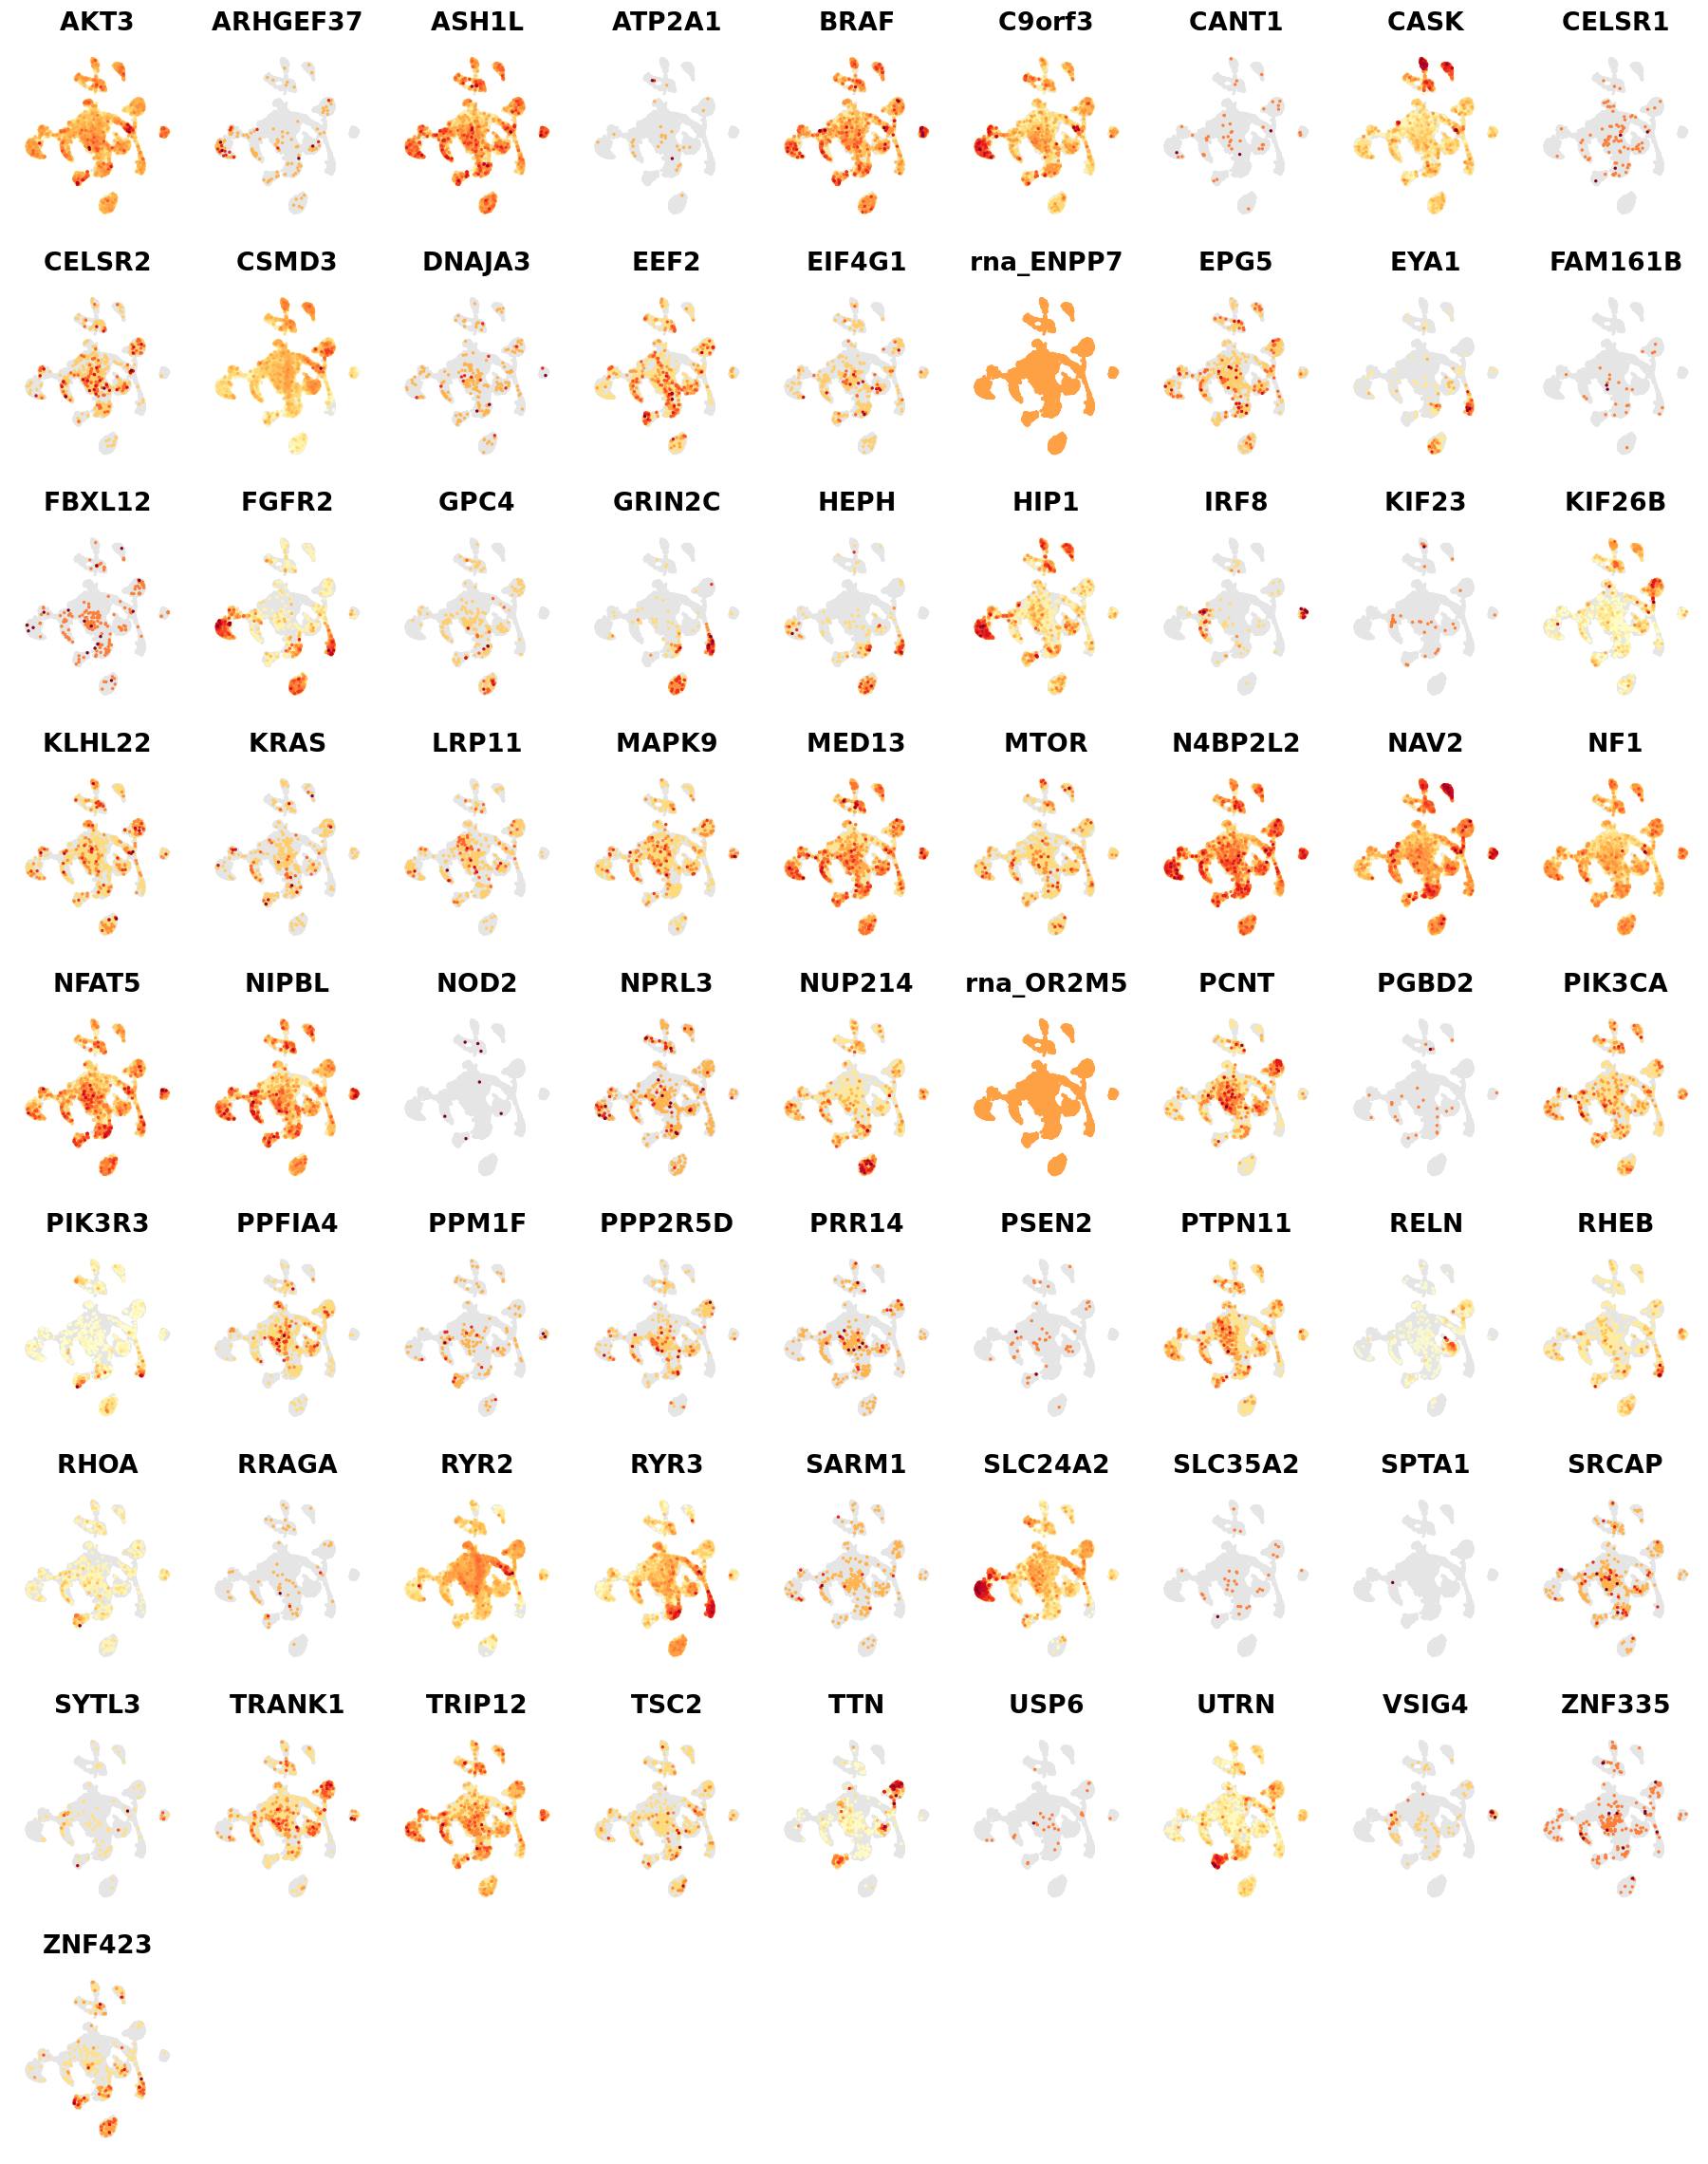

In [52]:
options(repr.plot.width=15, repr.plot.height=19)
do.call(gridExtra::grid.arrange, plist)

In [53]:
pdf("Extended_Data_Fig9.pdf",width = 15, height = 19, useDingbats = F)
do.call(gridExtra::grid.arrange, plist)
dev.off()

png 
  2

# Figure 6e UMAP

In [54]:
row.names(genelist) <-genelist$X
hvg <- VariableFeatures(df0)

In [55]:
length(row.names(df0@assays$SCT@data))

[1] 16449

In [56]:
genelist<-genelist[!(genelist$X %in% c("ENPP7","KRTAP9-8")),]

In [57]:
aaa<-intersect(row.names(df0@assays$SCT@data),genelist$X)

In [58]:
#datExpr <- t(as.matrix(GetAssayData(df0)))[,genelist$X]  # only use variable genes in analysis
datExpr<- t(as.matrix(df0@assays$SCT@data[aaa,] ))

In [59]:
datExpr

MTOR      PIK3R3    CELSR2    ASH1L     SPTA1 PPFIA4   
CTRL_AAACCCACAAATGGAT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAACCCAGTTGTAGCT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAACCCATCGAAGCAG-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.6931472
CTRL_AAACGAAAGCTTTCCC-1 0.0000000 0.6931472 0.0000000 0.6931472 0     0.0000000
CTRL_AAACGAAAGGTTCTAC-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAACGAACAGTTCCAA-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAACGAAGTATTCTCT-1 0.0000000 0.0000000 0.6931472 0.6931472 0     1.0986123
CTRL_AAACGAAGTTTAGACC-1 0.0000000 0.0000000 0.0000000 1.9459101 0     0.0000000
CTRL_AAACGAATCTGAGATC-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAACGCTTCGAAGAAT-1 0.0000000 0.6931472 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGAACCACGACTAT-1 0.6931472 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAAGAACCAGGTACGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGGATCACTACTTT-1 1.0986123 0.0000000 0.0000000 1.3862944 0     0.0000000
CTRL_AAAGGATGTCAGTTTG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAAGGGCCAATCAAGA-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AAAGTGAGTTCACCGG-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAAGTGATCCATACAG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AAATGGAGTTAGCGGA-1 0.6931472 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AAATGGAGTTCTTGCC-1 0.0000000 0.6931472 0.0000000 0.6931472 0     0.6931472
CTRL_AAATGGATCATATGGC-1 0.6931472 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AACAACCAGCGTATGG-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
CTRL_AACAAGATCACGATCA-1 0.0000000 0.0000000 0.6931472 0.6931472 0     0.6931472
CTRL_AACAAGATCCTTCAGC-1 0.0000000 0.0000000 0.6931472 0.6931472 0     0.6931472
CTRL_AACAGGGCATTACGGT-1 0.0000000 0.0000000 0.6931472 1.3862944 0     0.0000000
CTRL_AACCAACTCGCAGATT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCACAAGGACAGTC-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCACACACAGAAGC-1 0.6931472 0.0000000 0.6931472 1.7917595 0     0.0000000
CTRL_AACCATGAGTGTGTTC-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
CTRL_AACCATGCATGGAAGC-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
CTRL_AACCATGGTGGTCCCA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
⋮                       ⋮         ⋮         ⋮         ⋮         ⋮     ⋮        
4259_TTTGACTGTCCAGGTC-1 0.6931472 0.0000000 0.6931472 0.0000000 0     0.6931472
4259_TTTGACTGTCTGTCCT-1 0.0000000 0.0000000 0.0000000 1.6094379 0     0.0000000
4259_TTTGACTTCGTCAACA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGATCTCACTAGCA-1 0.0000000 0.0000000 0.0000000 1.0986123 0     0.0000000
4259_TTTGATCTCATGACAC-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGATCTCCCTCGTA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     1.0986123
4259_TTTGATCTCGCATGAT-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGGAGAGGACAAGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     1.0986123
4259_TTTGGAGCAACATACC-1 1.0986123 1.0986123 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGCAAGTCCCG-1 0.0000000 0.0000000 0.6931472 0.0000000 0     0.6931472
4259_TTTGGAGCACTACCCT-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGGAGCAGTTGAAA-1 0.0000000 0.0000000 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGGTCCCGTGA-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.6931472
4259_TTTGGAGTCACGAGGA-1 0.0000000 0.0000000 1.0986123 0.0000000 0     0.0000000
4259_TTTGGAGTCAGCAGAG-1 0.0000000 0.0000000 0.6931472 1.0986123 0     0.6931472
4259_TTTGGAGTCGGCTTGG-1 0.0000000 0.0000000 0.0000000 0.0000000 0     0.0000000
4259_TTTGGTTAGAGAGTGA-1 0.0000000 0.0000000 0.0000000 0.6931472 0     0.0000000
4259_TTTGGTTAGCTTGTTG-1 0.0000000 0.0000000 0.0000000 1.3862944 0     0.0000000
4259_TTTGGTTCAGGTCTCG-1 

In [60]:
Idents(df0) <- df0@meta.data$cell_type

In [61]:

net <- blockwiseModules(datExpr, power = 7,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize =100,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 No modules detected in block 1
 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15


Warning message in blockwiseModules(datExpr, power = 7, corType = "bicor", networkType = "signed", :
“blockwiseModules: mergeCloseModules failed with the following error message:
     Error in mergeCloseModules(datExpr, colors[gsg$goodGenes], cutHeight = mergeCutHeight,  : 
  Error in moduleEigengenes(expr = exprData[[set]]$data, colors = setColors,  : 
  Color levels are empty. Possible reason: the only color is grey and grey module is excluded from the calculation.

 
--> returning unmerged colors.
”


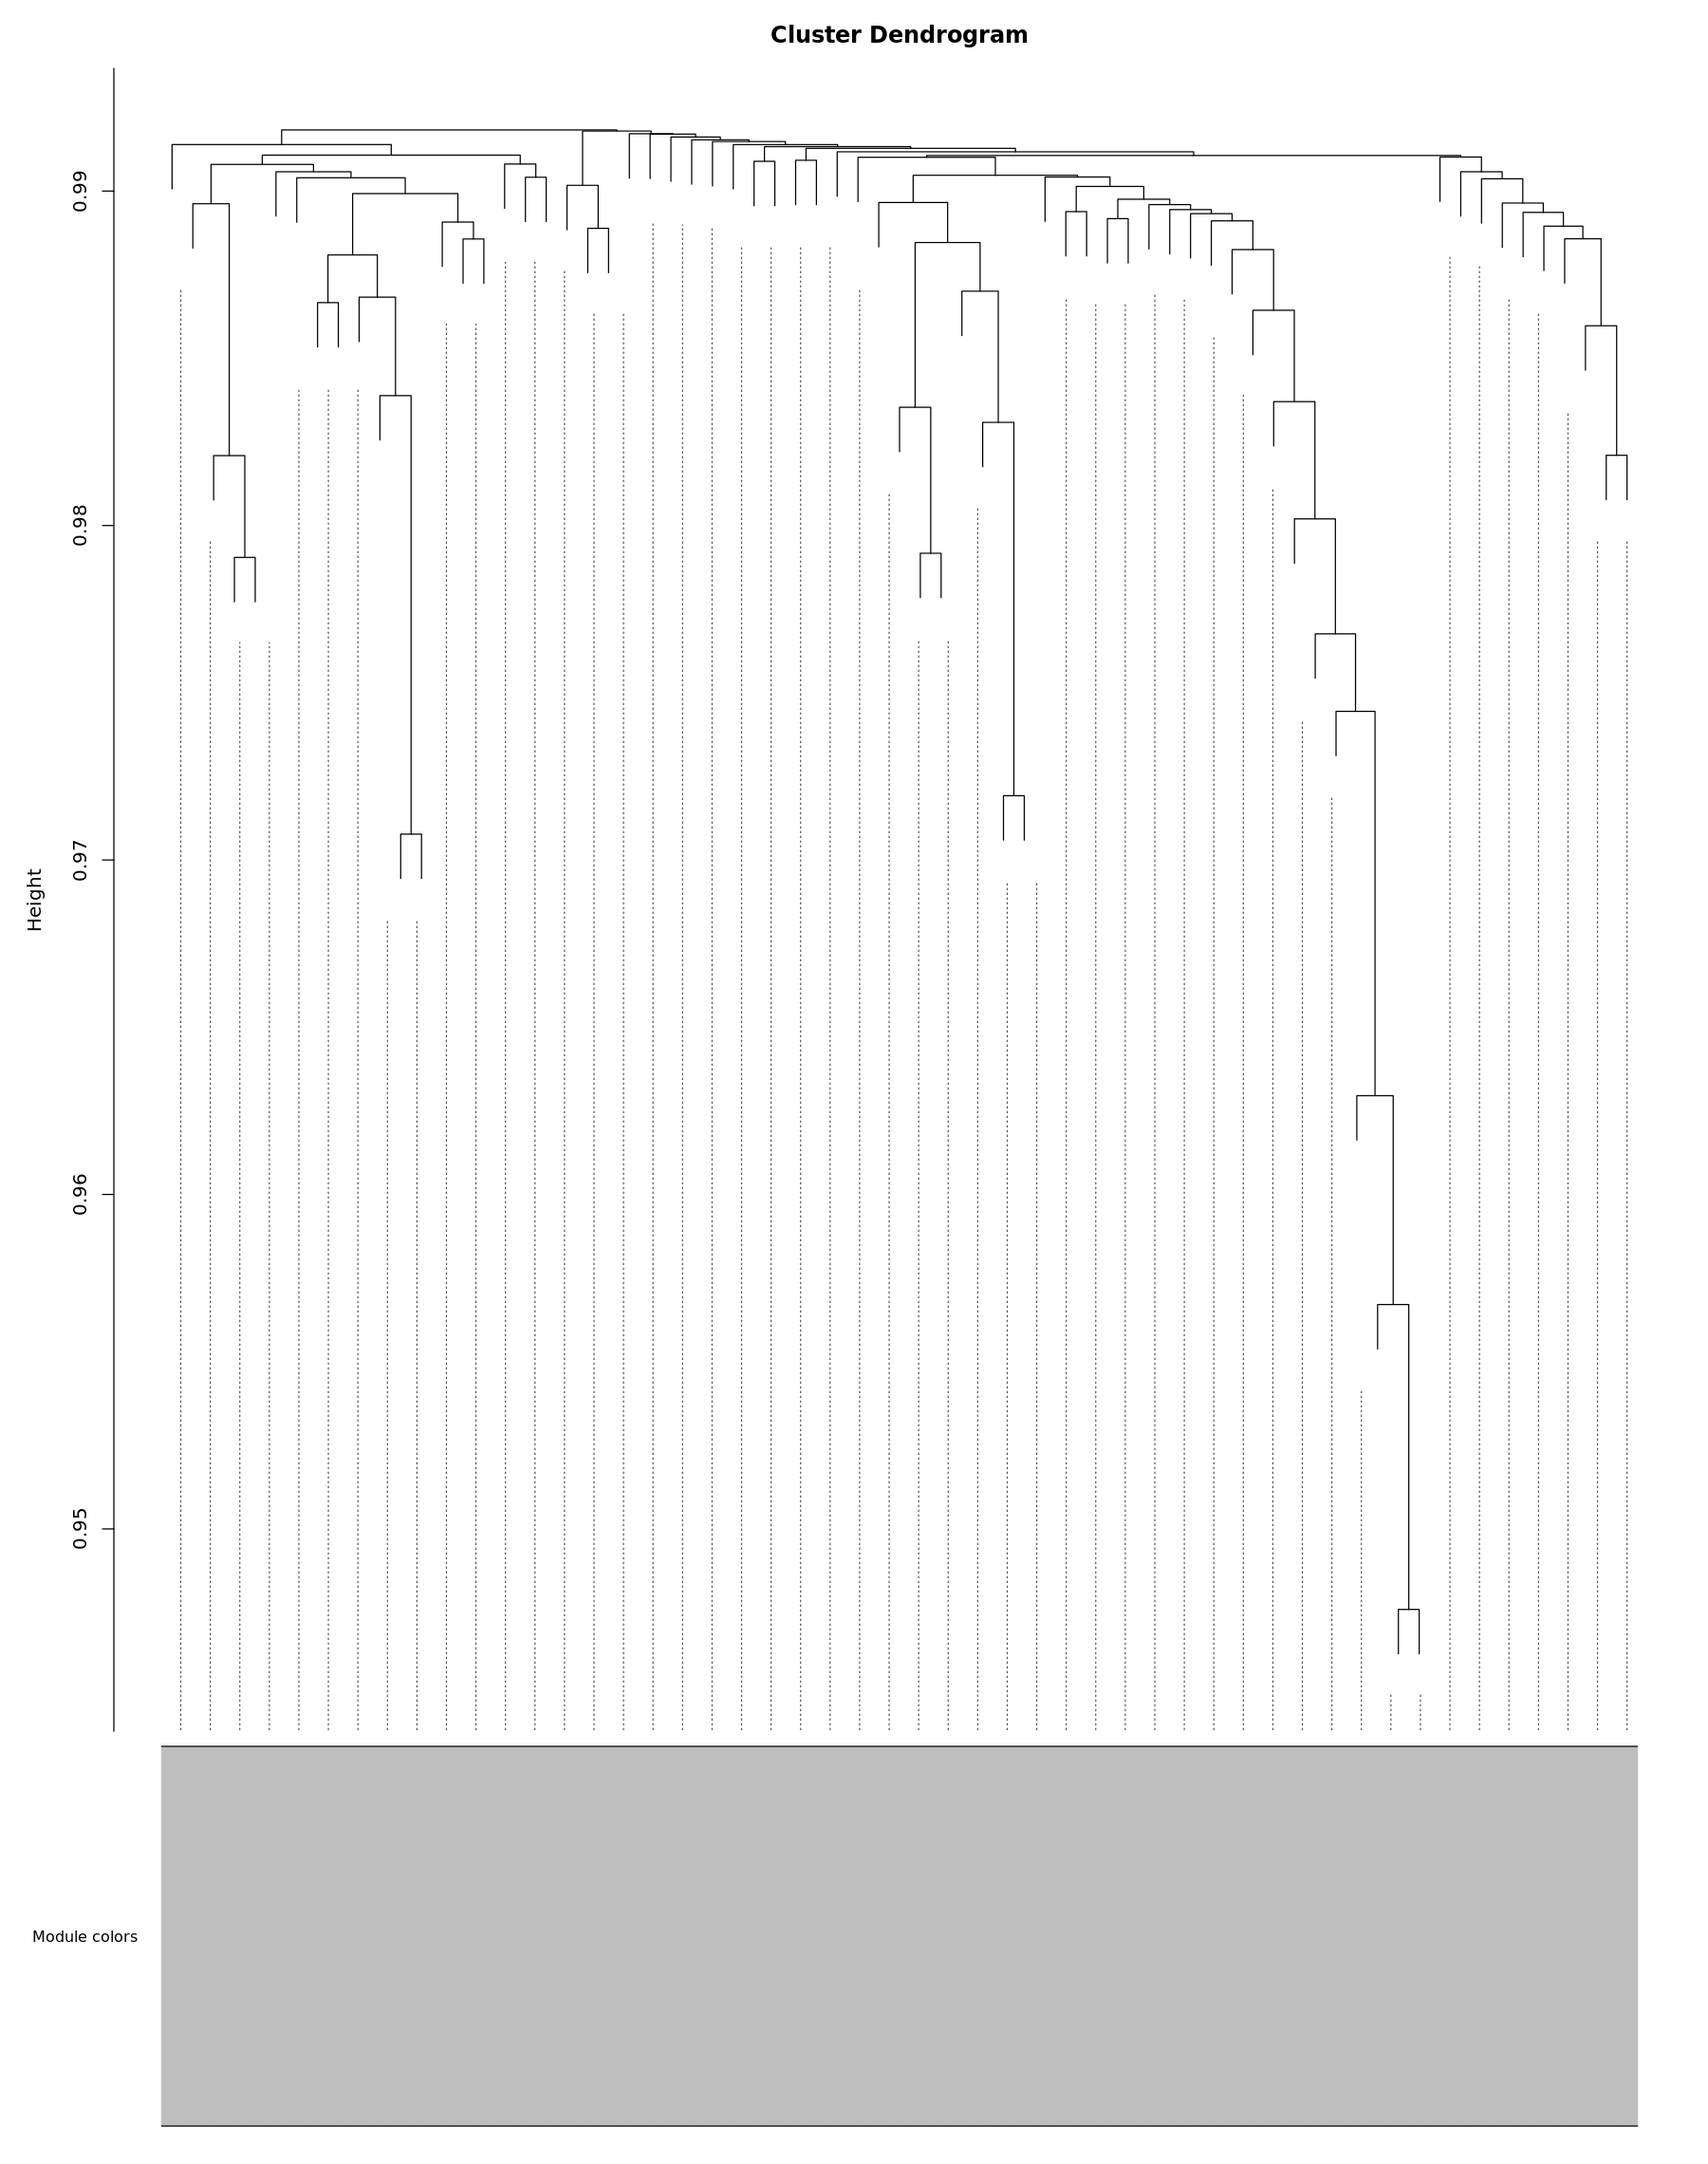

In [62]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

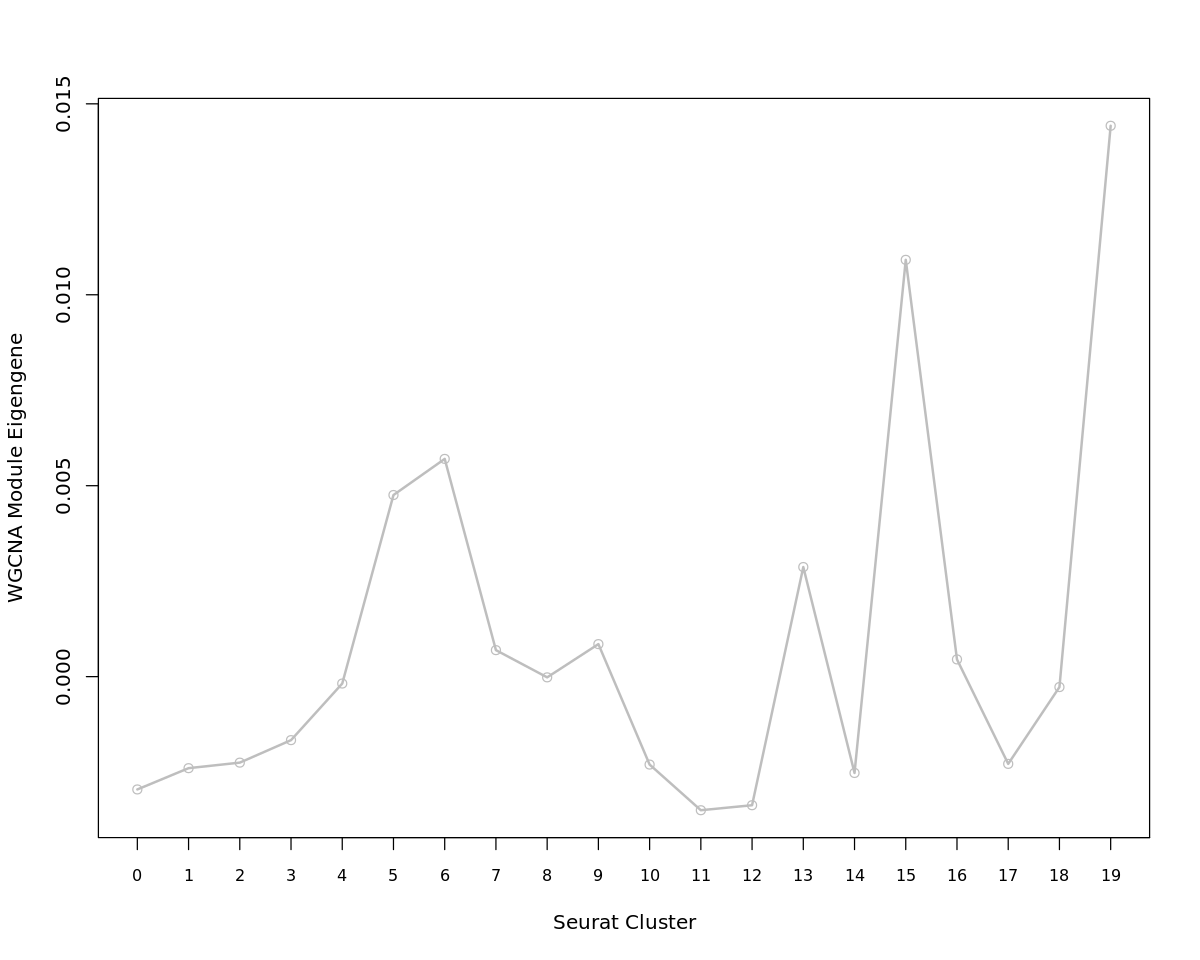

In [63]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- c("grey")
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:25, labels = 0:24, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

[[1]]


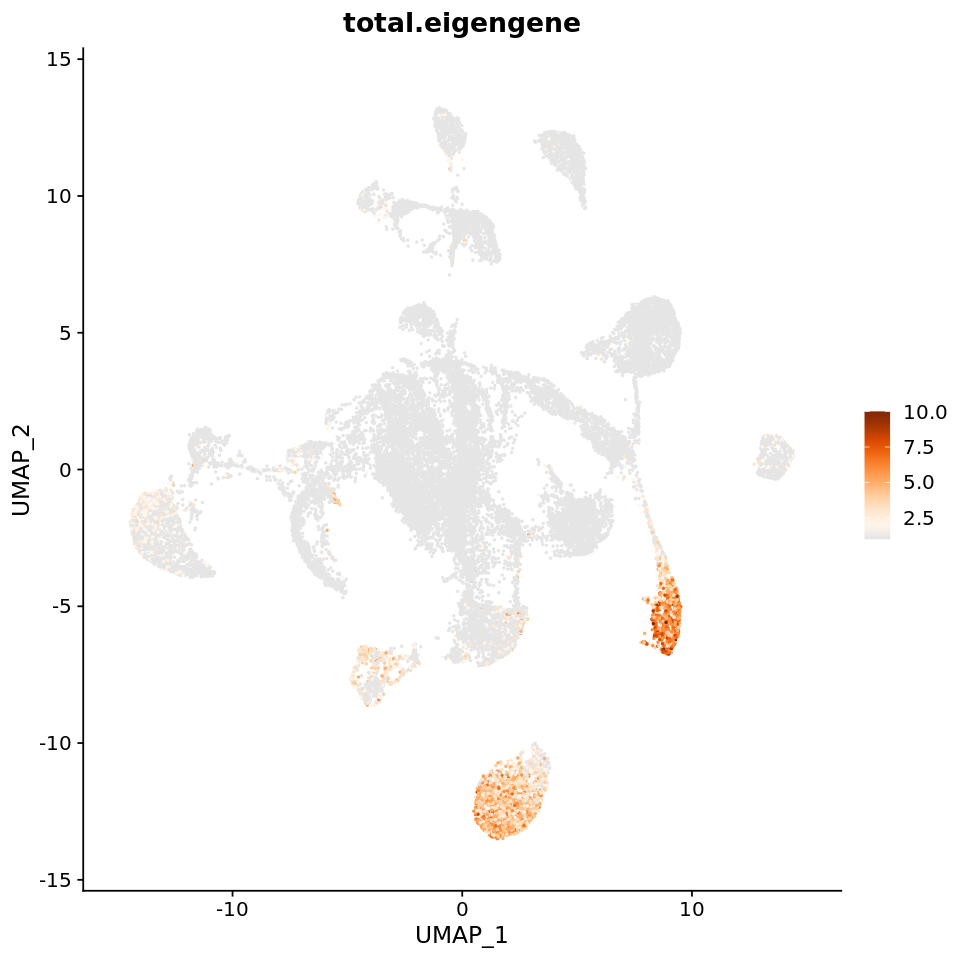

In [64]:
options(repr.plot.width=8, repr.plot.height=8)
total.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(total.eigengene) <- rownames(datExpr)
df0$total.eigengene <- total.eigengene
FeaturePlot(df0, features = "total.eigengene", 
            cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')),
            slot = 'data',
                     pt.size = 0.3,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15')

In [65]:
pdf("./Figure6e_UMAP.pdf",width=14, height=14)
options(repr.plot.width=8, repr.plot.height=8)
total.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(total.eigengene) <- rownames(datExpr)
df0$total.eigengene <- total.eigengene
FeaturePlot(df0, features = "total.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )
dev.off()

png 
  2

# Figure 6e dotplot

In [66]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(net$MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(datExpr))
}
moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");
res <- reshape2::melt(moduleTraitPvalue)
to.plot <- reshape2::melt(moduleTraitCor)
to.plot$p_value <- res$value
to.plot$value[to.plot$value <= 0] <- NA
unique(df0@meta.data$cell_type)
to.plot$Var2 <- factor(to.plot$Var2, levels = sort(unique(df0@meta.data$cell_type)))

[1] "InN1"   "ExN3"   "InN2"   "OPC"    "OD"     "Ast"    "EC"     "ImmOD" 
 [9] "MG"     "Ast-L2" "U"      "ExN1"   "ExN2"   "OD-L"   "ExN-L2" "Ast-L3"
[17] "OPC-L2" "ExN-L1" "OPC-L1" "Ast-L1"

In [67]:
cell_type_modules = c('MEgrey')

Warning message:
“Removed 12 rows containing missing values (geom_point).”


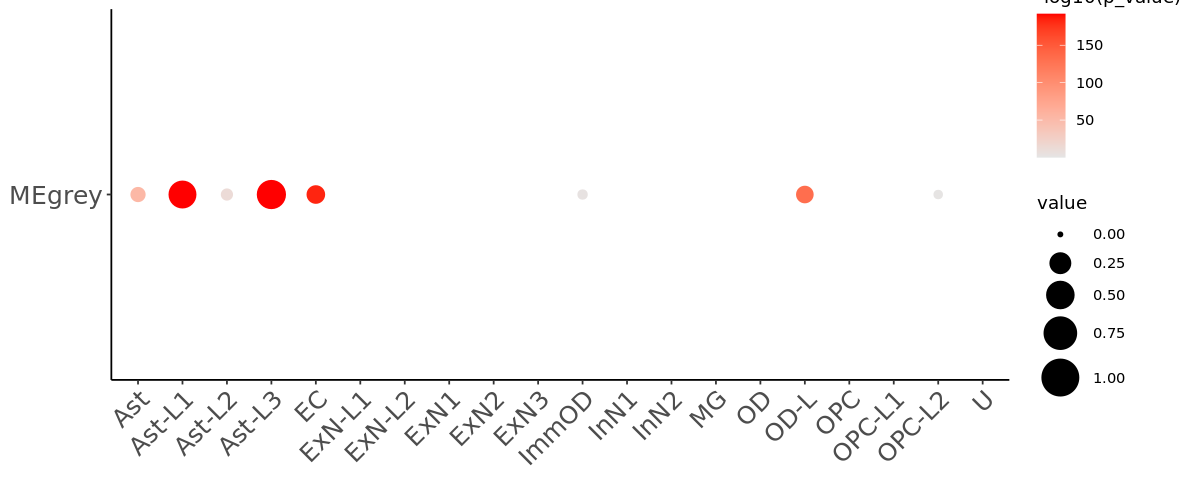

In [68]:
options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

In [69]:
pdf("Figure6e_dotplot.pdf", width=10, height=4)
options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 12 rows containing missing values (geom_point).”


png 
  2

# Figure 6f

In [70]:
net <- blockwiseModules(datExpr, power = 8,
  corType = "bicor", # use robust correlation
	networkType = "signed", minModuleSize =2,
	reassignThreshold = 0, mergeCutHeight = 0.15,
	numericLabels = F, pamRespectsDendro = FALSE,
	saveTOMs = TRUE,
	saveTOMFileBase = "TOM",
	verbose = 3)

 Calculating module eigengenes block-wise from all genes
   Flagging genes and samples with too many missing values...
    ..step 1
 ..Working on block 1 .
    TOM calculation: adjacency..
    ..will not use multithreading.
     Fraction of slow calculations: 0.000000
    ..connectivity..
    ..matrix multiplication (system BLAS)..
    ..normalization..
    ..done.
   ..saving TOM for block 1 into file TOM-block.1.RData
 ....clustering..
 ....detecting modules..
 ....calculating module eigengenes..
 ....checking kME in modules..


Warning message in bicor(structure(c(0, 0, 0.693147180559945, 0, 0, 0.693147180559945, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0, 0, 0, 0, 0, 0, 0.693147180559945, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 3 genes from module 2 because their KME is too low.


Warning message in bicor(structure(c(1.09861228866811, 0.693147180559945, 1.38629436111989, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”
Warning message in bicor(structure(c(0.693147180559945, 1.79175946922805, 0, 0, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 2 genes from module 4 because their KME is too low.


Warning message in bicor(structure(c(0, 0.693147180559945, 0, 0, 0, 0.693147180559945, :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


     ..removing 1 genes from module 5 because their KME is too low.


Warning message in (function (x, y = NULL, robustX = TRUE, robustY = TRUE, use = "all.obs", :
“bicor: zero MAD in variable 'x'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


 ..merging modules that are too close..
     mergeCloseModules: Merging modules whose distance is less than 0.15
       Calculating new MEs...


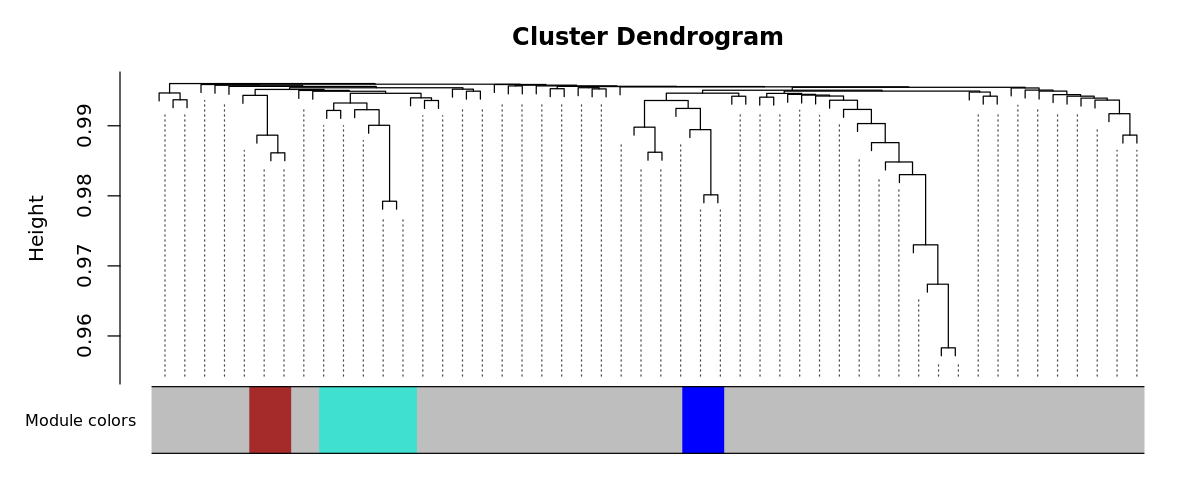

In [71]:
# Convert labels to colors for plotting
mergedColors = net$colors
# Plot the dendrogram and the module colors underneath
plotDendroAndColors(net$dendrograms[[1]], mergedColors[net$blockGenes[[1]]],
"Module colors",
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [72]:
unique(net$colors)

[1] "grey"      "turquoise" "brown"     "blue"

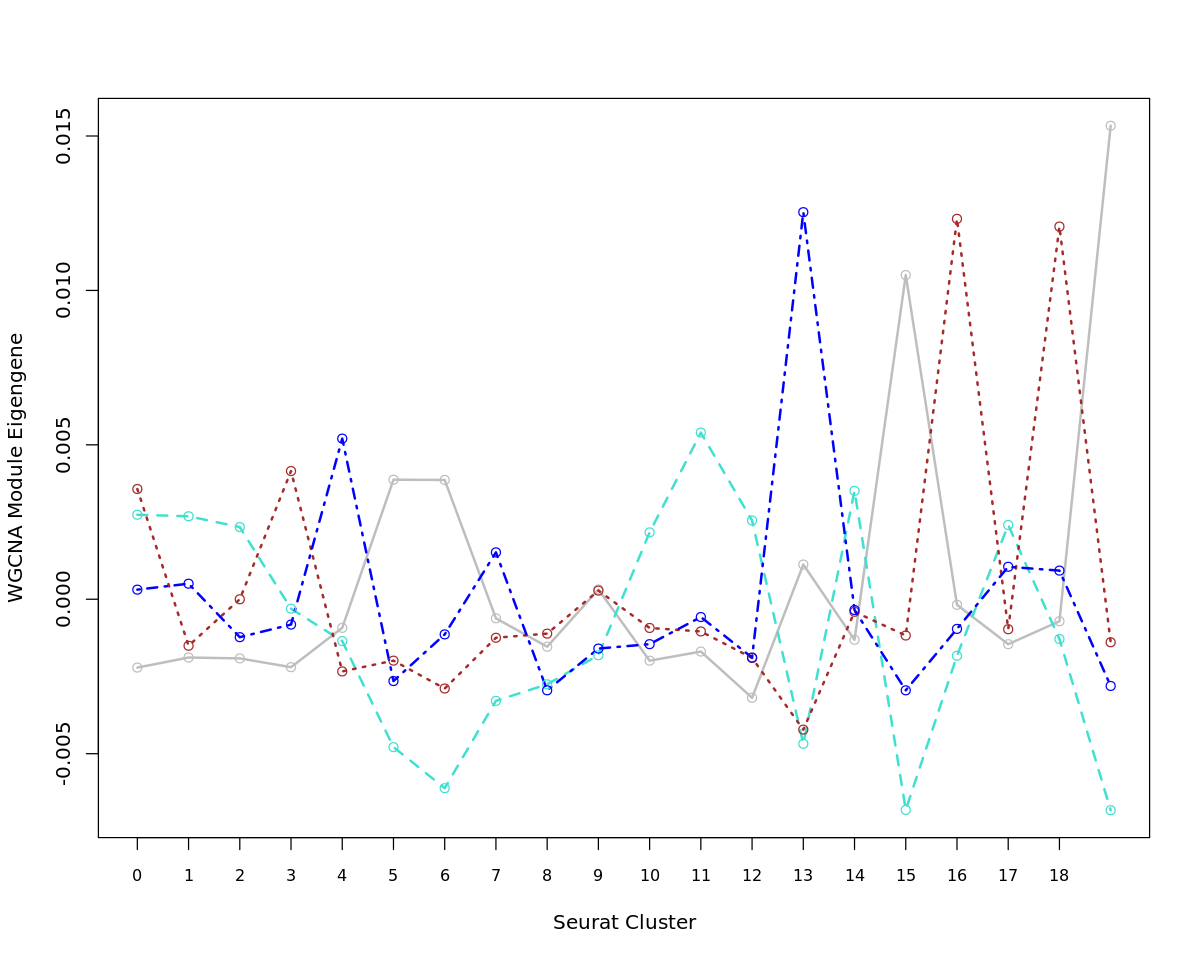

In [73]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- unique(net$colors) # update colors
plotdat <- sapply(modules, f)
matplot(plotdat, col = modules, type = "l", lwd = 2, xaxt = "n", xlab = "Seurat Cluster",
        ylab = "WGCNA Module Eigengene")
axis(1, at = 1:19, labels = 0:18, cex.axis = 0.8)
matpoints(plotdat, col = modules, pch = 21)

In [74]:
options(repr.plot.width=10, repr.plot.height=8)

f <- function(module){
  eigengene <- unlist(net$MEs[paste0("ME", module)])
  means <- tapply(eigengene, Idents(df0), mean, na.rm = T)
  return(means)
}
modules <- unique(net$colors)
plotdat <- sapply(modules, f)

In [75]:
color<-as.data.frame(net$colors)
write.csv(color,"./GeneToColor.csv",row.names=TRUE)

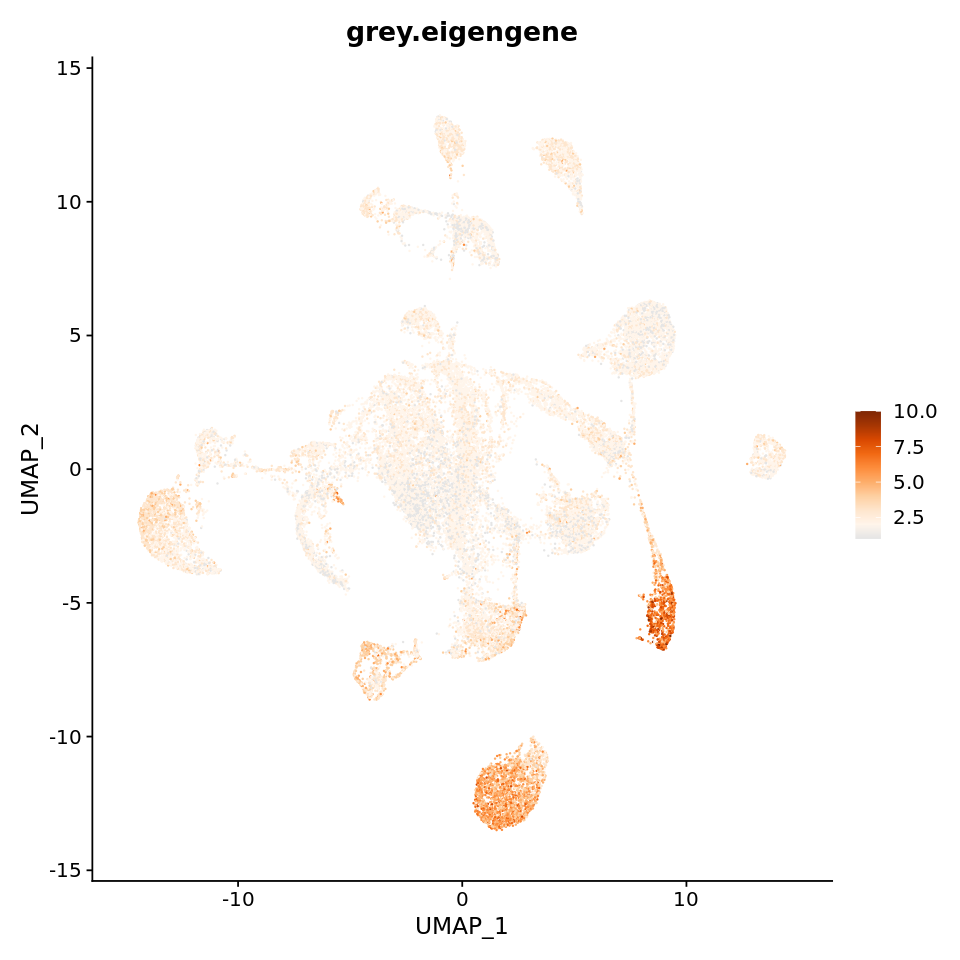

In [76]:
options(repr.plot.width=8, repr.plot.height=8)
grey.eigengene <- unlist(net$MEs[paste0("ME", "grey")])
names(grey.eigengene) <- rownames(datExpr)
df0$grey.eigengene <- grey.eigengene
FeaturePlot(df0, features = "grey.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

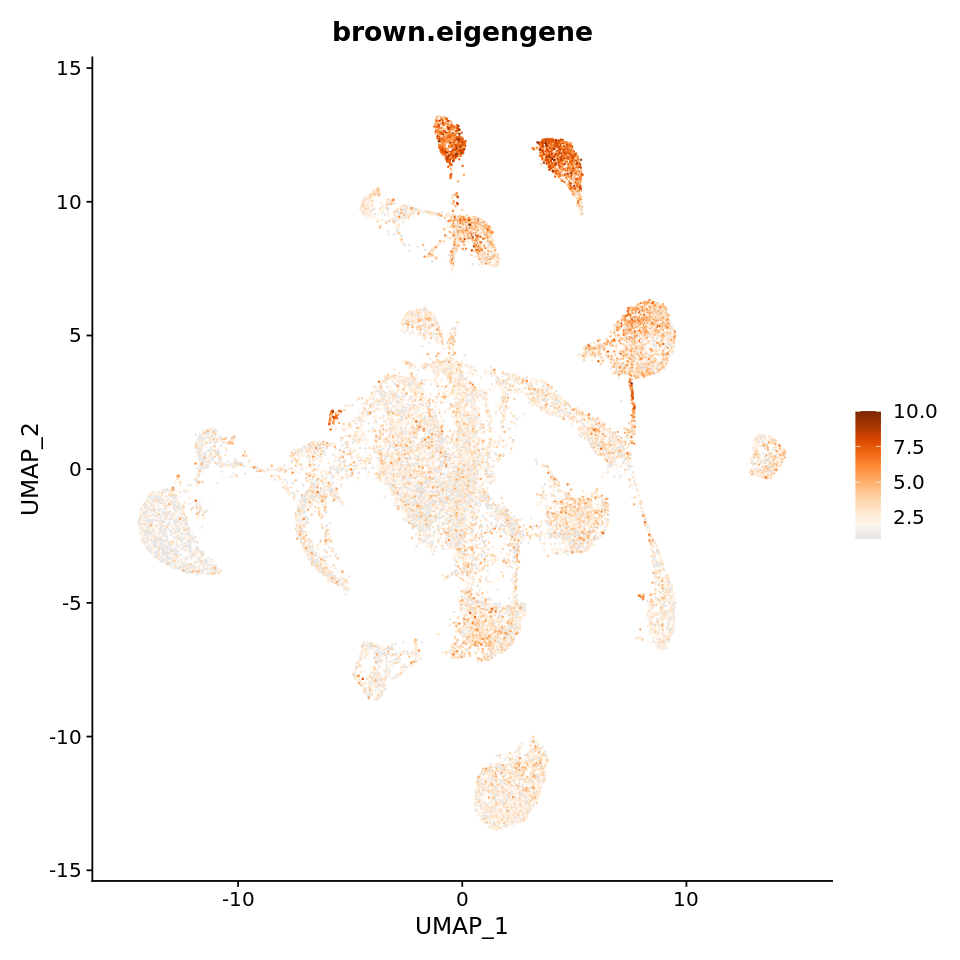

In [77]:
options(repr.plot.width=8, repr.plot.height=8)
brown.eigengene <- unlist(net$MEs[paste0("ME", "brown")])
names(brown.eigengene) <- rownames(datExpr)
df0$brown.eigengene <- brown.eigengene
FeaturePlot(df0, features = "brown.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

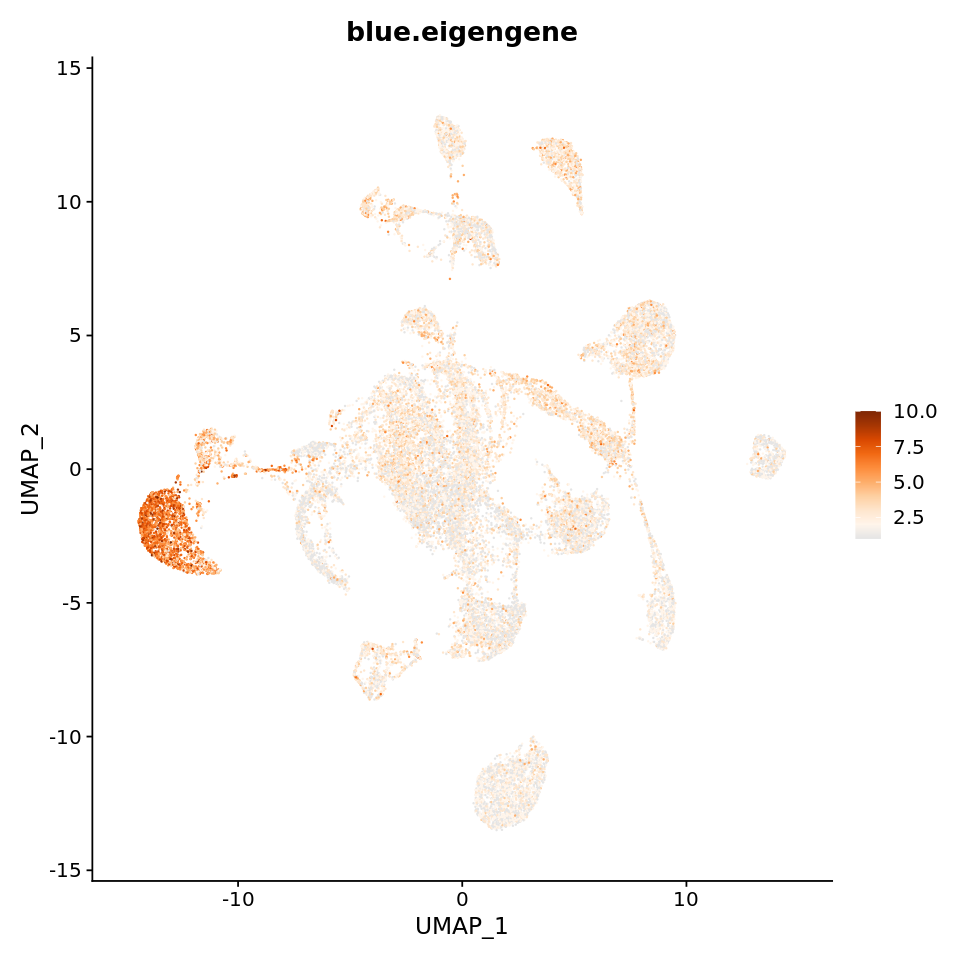

In [78]:
options(repr.plot.width=8, repr.plot.height=8)
blue.eigengene <- unlist(net$MEs[paste0("ME", "blue")])
names(blue.eigengene) <- rownames(datExpr)
df0$blue.eigengene <- blue.eigengene
FeaturePlot(df0, features = "blue.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

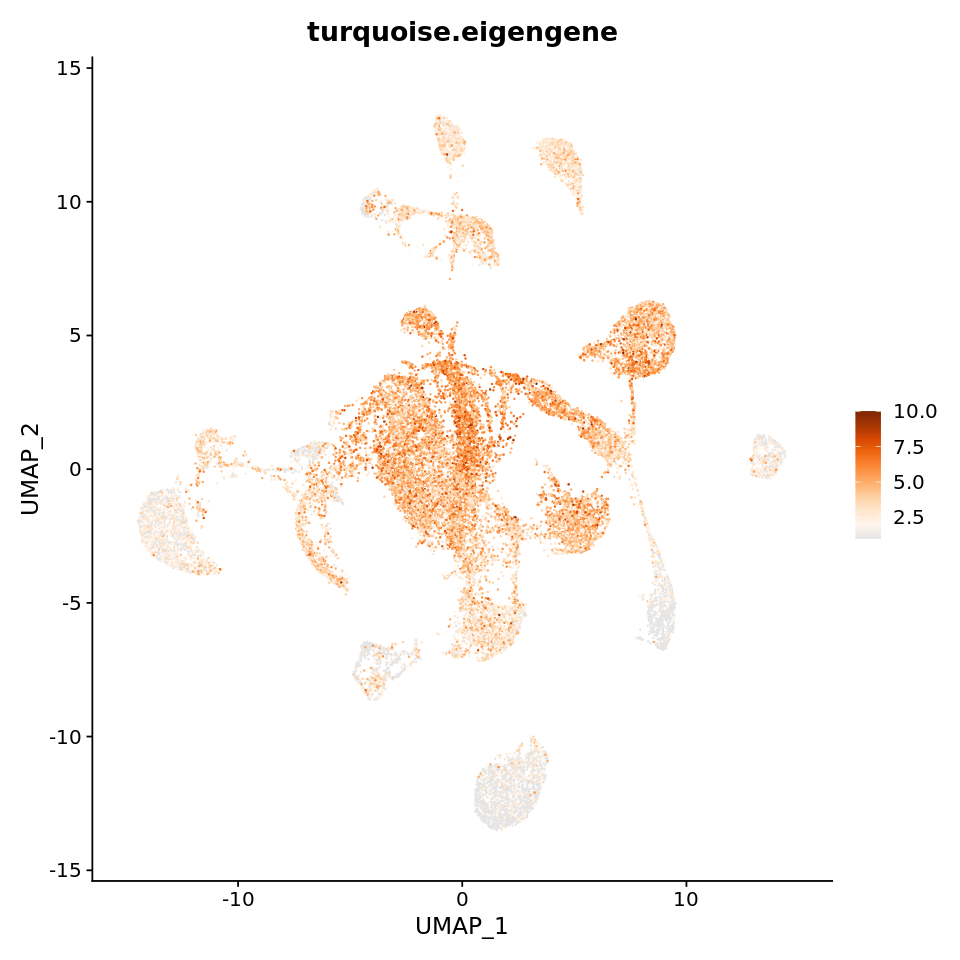

In [79]:
options(repr.plot.width=8, repr.plot.height=8)
turquoise.eigengene <- unlist(net$MEs[paste0("ME", "turquoise")])
names(turquoise.eigengene) <- rownames(datExpr)
df0$turquoise.eigengene <- turquoise.eigengene
FeaturePlot(df0, features = "turquoise.eigengene", cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges'))
    )

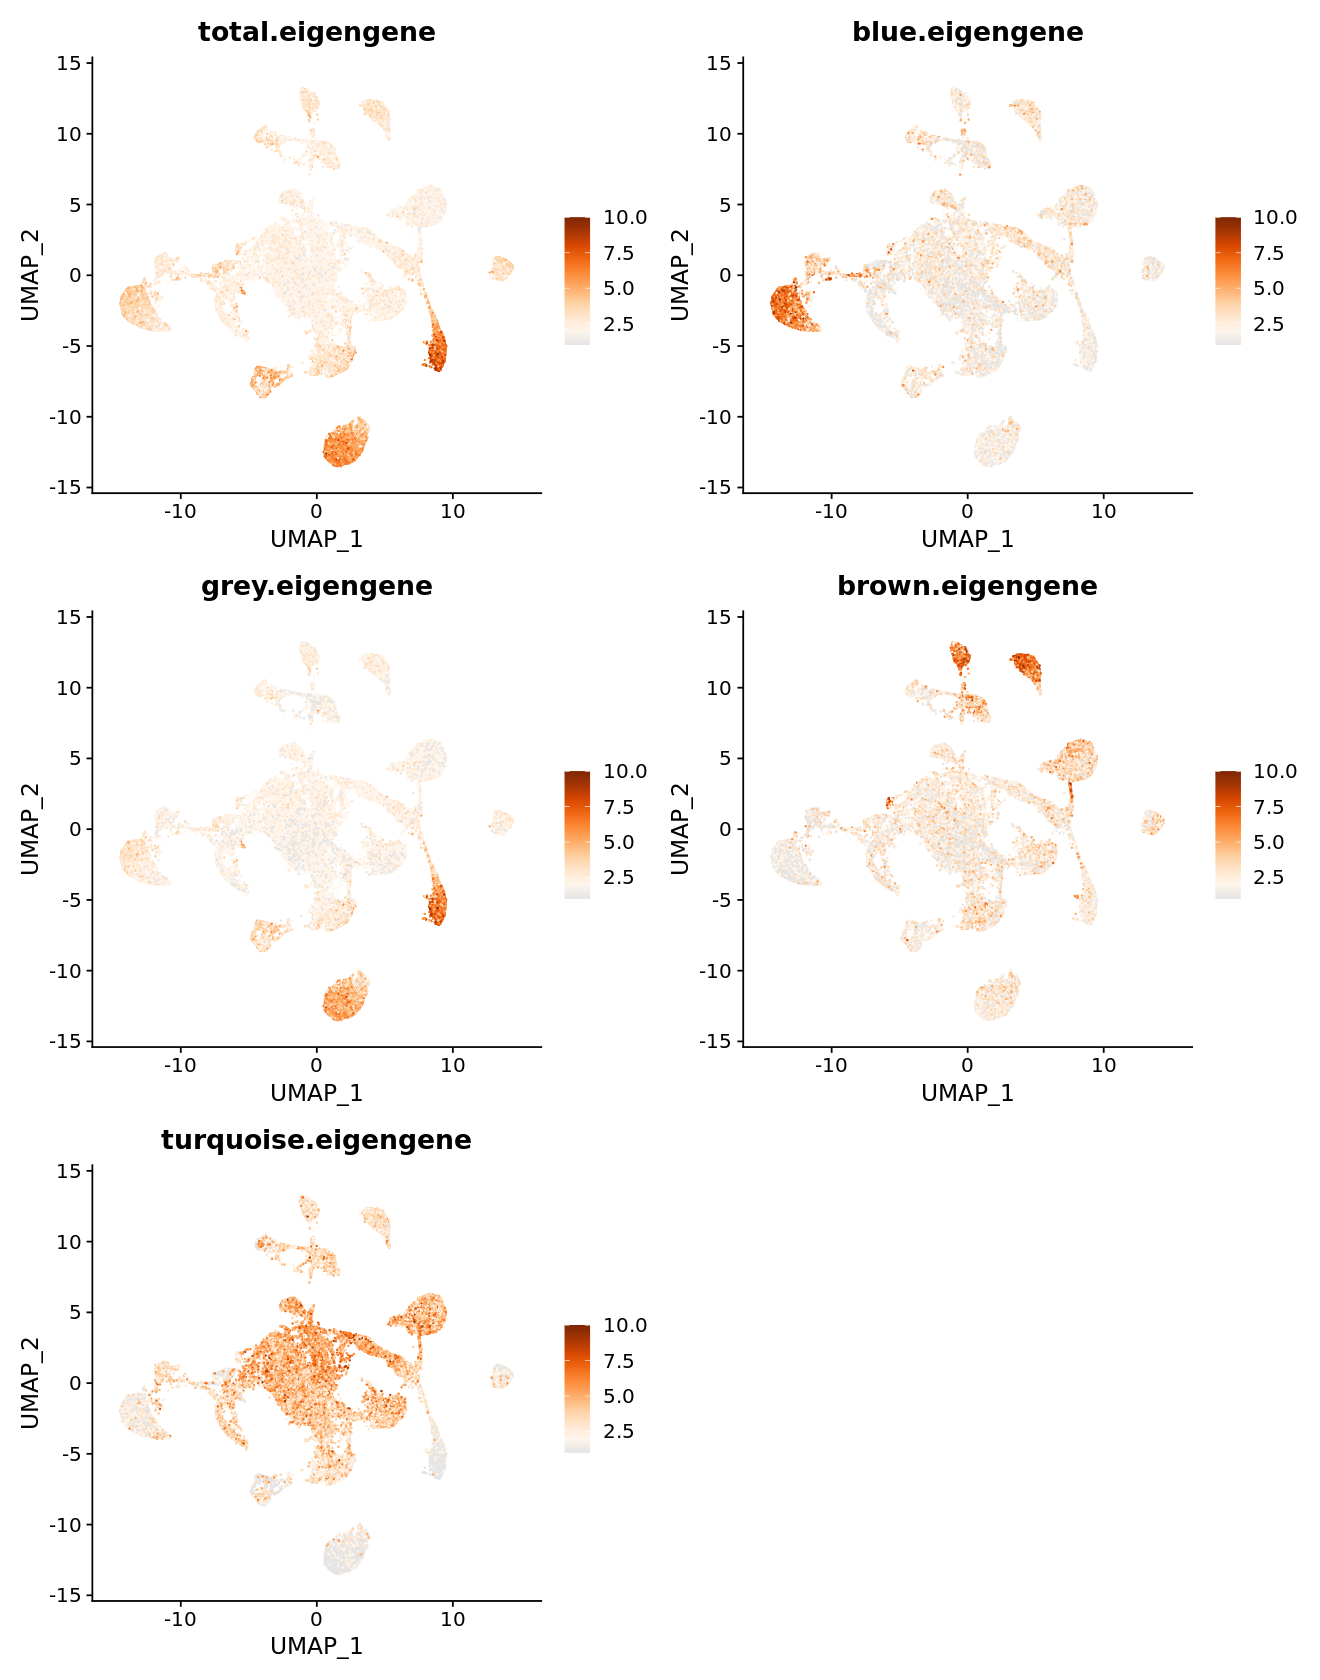

In [80]:
options(repr.plot.width=11, repr.plot.height=14)
FeaturePlot(df0, features = c("total.eigengene","blue.eigengene", "grey.eigengene",
                              "brown.eigengene", "turquoise.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))

In [81]:
pdf("./Figure6f_UMAP.pdf",width=14, height=14)
options(repr.plot.width=11, repr.plot.height=14)
FeaturePlot(df0, features = c("total.eigengene","blue.eigengene", "grey.eigengene",
                              "brown.eigengene", "turquoise.eigengene")
           ,cols = c("grey90",RColorBrewer::brewer.pal(n = 9,name = 'Oranges')
           ))
dev.off()

png 
  2

In [82]:
moduleTraitCor <- list()
moduleTraitPvalue <- list()
header = as.character(df0@meta.data$cell_type) #as.character(paste(GB$Species,  GB$Time_point, GB$IDX))
for(i in unique(header)[order(unique(header))]){
  h <- header
  h[header != i] <- 0
  h[header == i] <- 1
  moduleTraitCor[[i]] <- cor(net$MEs, as.numeric(h), use = "p")
  moduleTraitPvalue[[i]] <- corPvalueStudent(moduleTraitCor[[i]], nrow(datExpr))
}

moduleTraitCor <- do.call(cbind, moduleTraitCor)
moduleTraitPvalue <- do.call(cbind, moduleTraitPvalue)
colnames(moduleTraitCor) <- sort(unique(header))
colnames(moduleTraitPvalue) <- sort(unique(header))
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
                   signif(moduleTraitPvalue, 1), ")", sep = "");

moduleTraitCor

res <- reshape2::melt(moduleTraitPvalue)
to.plot <- reshape2::melt(moduleTraitCor)
to.plot$p_value <- res$value
#to.plot$value[to.plot$value <= 0] <- NA
unique(df0@meta.data$cell_type)

Ast         Ast-L1      Ast-L2      Ast-L3      EC         
MEblue      -0.04731092 -0.09211874 -0.07303923 -0.14332921 -0.03147588
MEbrown     -0.03550093 -0.04568958  0.01280335 -0.05707912 -0.07995494
MEturquoise -0.08551917 -0.22415853 -0.08294820 -0.33157727 -0.16922113
MEgrey       0.06915237  0.50309025  0.01448650  0.51028529  0.10686009
            ExN-L1      ExN-L2       ExN1        ExN2       ExN3       
MEblue       0.04344547 -0.008202436 -0.03695651 -0.1197287  0.02431218
MEbrown     -0.04011031 -0.009567968 -0.06686802 -0.1205165 -0.07256671
MEturquoise  0.09933894  0.082719915  0.34617463  0.1617646  0.12957621
MEgrey      -0.06010725 -0.030939674 -0.10862047 -0.2023579 -0.09095884
            ImmOD       InN1        InN2          MG          OD         
MEblue       0.04240658  0.01701608 -5.364904e-02 -0.15054548  0.16573615
MEbrown     -0.03482299  0.19503484 -1.111147e-05 -0.05681830 -0.07446190
MEturquoise -0.09186705  0.14950595  1.021837e-01 -0.14061867 -0.04317447
MEgrey      -0.01724250 -0.12086158 -8.372821e-02 -0.07847445 -0.02946981
            OD-L        OPC         OPC-L1      OPC-L2       U          
MEblue       0.58511234 -0.03258838  0.03012730 -0.026787306 -0.05313701
MEbrown     -0.19706253  0.16510987  0.39187043  0.343753013 -0.03396377
MEturquoise -0.21842691 -0.01211997 -0.04181608 -0.051069859  0.07916152
MEgrey       0.05247574 -0.08749467 -0.02312727 -0.005042148 -0.07269700

[1] "InN1"   "ExN3"   "InN2"   "OPC"    "OD"     "Ast"    "EC"     "ImmOD" 
 [9] "MG"     "Ast-L2" "U"      "ExN1"   "ExN2"   "OD-L"   "ExN-L2" "Ast-L3"
[17] "OPC-L2" "ExN-L1" "OPC-L1" "Ast-L1"

[1] MEblue      MEbrown     MEturquoise MEgrey     
Levels: MEblue MEbrown MEturquoise MEgrey

Warning message:
“Removed 54 rows containing missing values (geom_point).”


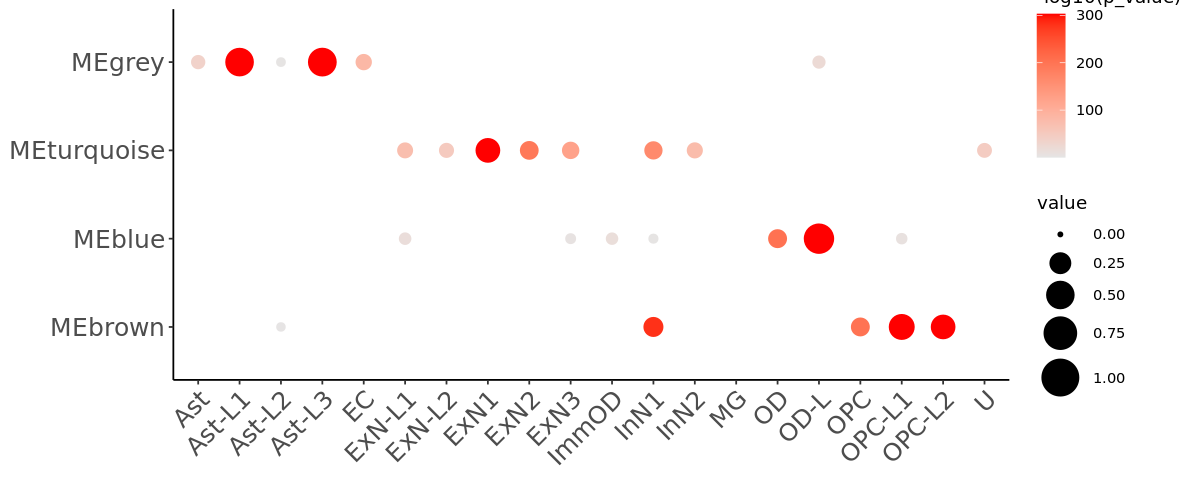

In [83]:
to.plot$Var2 <- factor(to.plot$Var2, 
                       levels = sort(unique(df0@meta.data$cell_type)))

unique(to.plot$Var1)

cell_type_modules = c('MEbrown','MEblue','MEturquoise','MEgrey')

options(repr.plot.width = 10, repr.plot.height = 4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))

#purple: oligo

In [84]:
pdf("Figure6f_dotplot.pdf", width=10, height=4)
to.plot %>%
    filter(Var1 %in% cell_type_modules) %>%
    mutate(Var1 = factor(Var1, 
                         levels=cell_type_modules,
                        labels = cell_type_modules)) %>%
    ggplot( aes(x = Var2, y = Var1, size = value, color = -log10(p_value))) +
      geom_point(na.rm = F) +
      scale_size_continuous(limits = c(0,1), range=c(1,10)) + 
      scale_color_continuous(low = "grey90", high = "Red", 
                             na.value = "red") +
      theme_classic()+
      theme(axis.title = element_blank(),
          axis.text.x = element_text(angle = 45,size=15,hjust = 1),
            axis.text.y = element_text(size=15),
            panel.grid.minor = element_line(color = "black"))
dev.off()

Warning message:
“Removed 54 rows containing missing values (geom_point).”


png 
  2

# TSC vs CTRL pseudo bulk DEG

In [85]:
Idents(df0) <- "disease"

In [86]:
genelist<-read.csv("../FCD_gene_list.csv",header=TRUE)

In [87]:
df0

An object of class Seurat 
35211 features across 33206 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [88]:
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "FGFR2"   "LRP11"   "RYR2"    "TRANK1"  "PCNT"    "GRIN2C"  "PTPN11" 
 [8] "MAPK9"   "CSMD3"   "PIK3R3"  "CASK"    "RELN"    "TTN"     "RYR3"   
[15] "HIP1"    "SLC24A2"

[1] 16

[1] 7

[1] "FGFR2"   "GRIN2C"  "PIK3R3"  "CASK"    "RYR3"    "HIP1"    "SLC24A2"

[1] 9

[1] "LRP11"  "RYR2"   "TRANK1" "PCNT"   "PTPN11" "MAPK9"  "CSMD3"  "RELN"  
[9] "TTN"

[1] 792

[1] 943

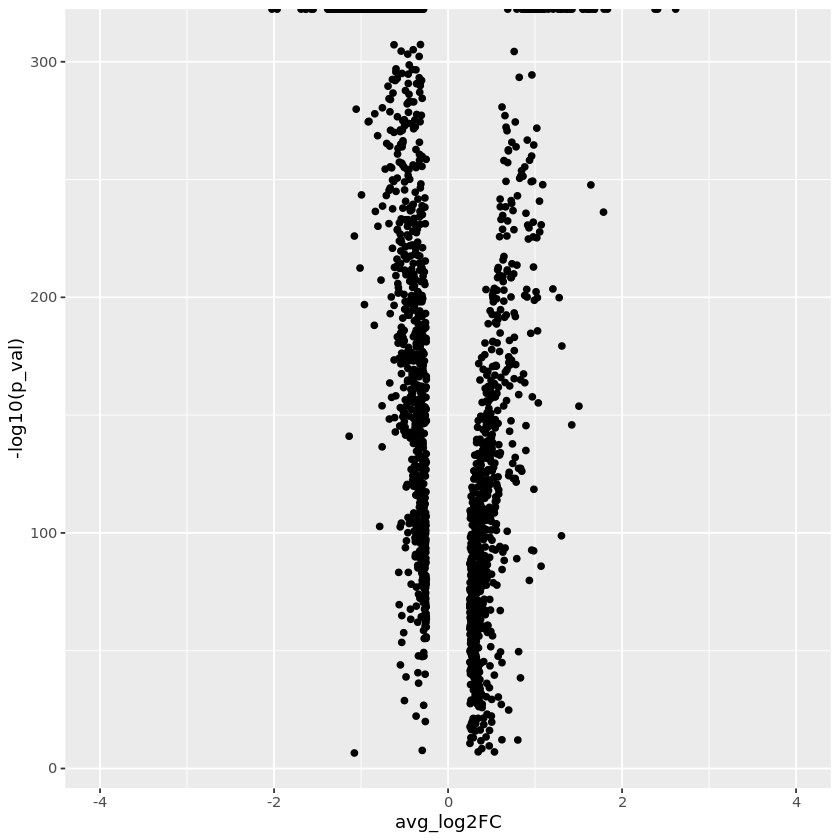

In [89]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

In [90]:
DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "RYR2"    "LRP11"   "PTPN11"  "NFAT5"   "RYR3"    "HIP1"    "SLC24A2"
 [8] "KIF26B"  "UTRN"    "TTN"

[1] 10

[1] 2

[1] "RYR2" "RYR3"

[1] 8

[1] "LRP11"   "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2" "KIF26B"  "UTRN"   
[8] "TTN"

[1] 203

[1] 814

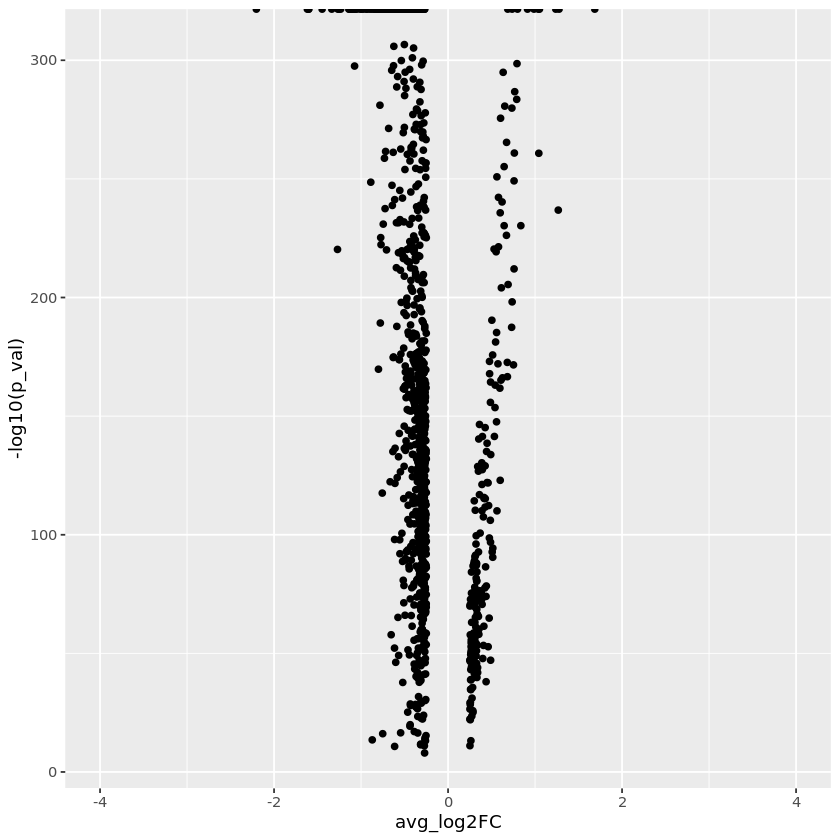

In [91]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

In [92]:
DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

[1] "LRP11"   "SLC24A2" "NFAT5"   "NAV2"    "CSMD3"   "ASH1L"   "KIF26B"

[1] 7

[1] 3

[1] "NAV2"   "ASH1L"  "KIF26B"

[1] 4

[1] "LRP11"   "SLC24A2" "NFAT5"   "CSMD3"

[1] 210

[1] 771

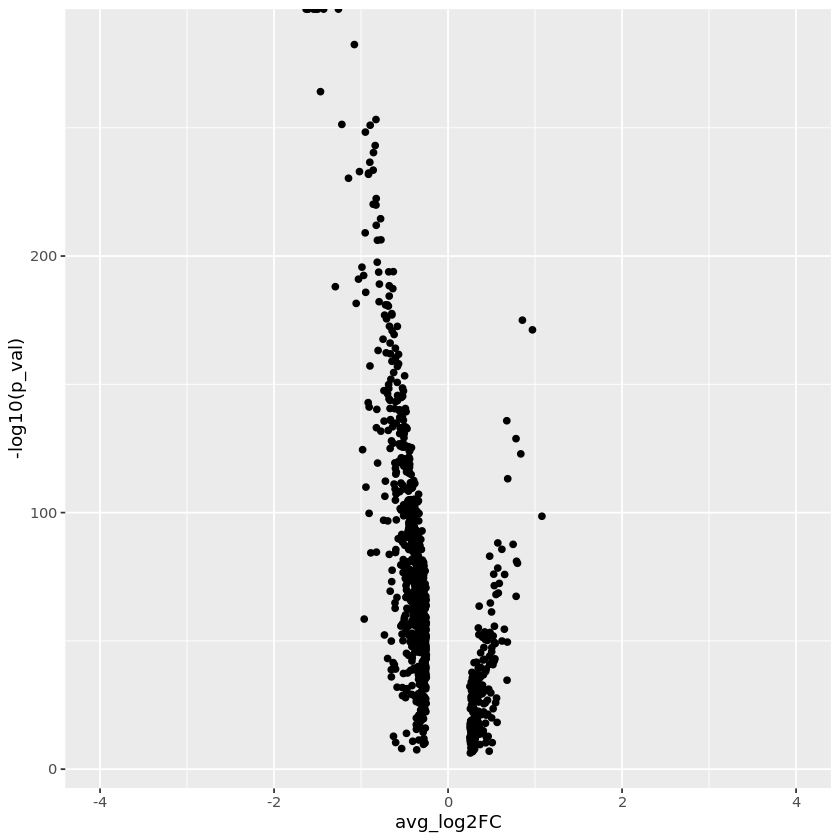

In [93]:
options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

In [94]:
intersect(hmedegup,intersect(tscdegup,fcddegup))
intersect(hmedegdown,intersect(tscdegdown,fcddegdown))

[1] "NFIA"       "NCKAP5"     "FMNL2"      "FHIT"       "ZBTB20"    
 [6] "LSAMP"      "SLC1A3"     "PPP2R2B"    "QKI"        "NKAIN3"    
[11] "FCHSD2"     "CADM1"      "NTM"        "ITPR2"      "GPC5"      
[16] "NPAS3"      "WWOX"       "SNRNP70"    "ANKRD44"    "FOXN3"     
[21] "TNS3"       "RNF130"     "DST"        "CSGALNACT1" "BAZ2B"     
[26] "CTNND2"     "RORA"       "SFMBT2"     "COL5A3"     "KMT2C"     
[31] "SLC35F1"    "SUMF1"      "CHD9"       "NASP"       "DIP2C"     
[36] "TBC1D22A"   "OPCML"      "FRMD4A"

[1] "CAMK2N1"   "NCDN"      "ATP6V0B"   "ELAVL4"    "RNF11"     "SSX2IP"   
  [7] "LRRC8B"    "ATP1B1"    "NMNAT2"    "CCSAP"     "TOMM20"    "CHRM3"    
 [13] "HPCAL1"    "ROCK2"     "FAM49A"    "VSNL1"     "PPP1CB"    "CALM2"    
 [19] "BCL11A"    "PPP3R1"    "CREG2"     "KCNJ3"     "CSRNP3"    "CHN1"     
 [25] "GLS"       "MAP2"      "PTPRN"     "SCG2"      "CNTN4"     "ITPR1"    
 [31] "ATP2B2"    "RFTN1"     "ARPP21"    "CCK"       "BSN"       "WDR82"    
 [37] "SYNPR"     "TAGLN3"    "CD200"     "SERPINI1"  "FAM131A"   "EIF4A2"   
 [43] "LDB2"      "GABRA4"    "ARHGAP10"  "BASP1"     "CDH18"     "CDH9"     
 [49] "LMBRD2"    "HCN1"      "ENC1"      "HOMER1"    "FSTL4"     "PPP2CA"   
 [55] "MATR3"     "CXXC5"     "CAMK2A"    "GABRB2"    "GABRA1"    "FBLL1"    
 [61] "CPLX2"     "SNCB"      "CAP2"      "HSPA1A"    "HSPA1B"    "TMEM63B"  
 [67] "HSP90AB1"  "MLIP"      "KCNQ5"     "TMEM30A"   "TSPYL4"    "TSPYL1"   
 [73] "MAN1A1"    "CLVS2"     "HIVEP2"    "PDE10A"    "SNX10"     "HECW1"    
 [79] "CAMK2B"    "VSTM2A"    "YWHAG"     "PCLO"      "FAM3C"     "PLXNA4"   
 [85] "MTPN"      "DNAJB6"    "NUDT11"    "UBQLN2"    "PJA1"      "NAP1L2"   
 [91] "NAP1L3"    "GPRASP1"   "GPRASP2"   "BEX1"      "IDS"       "VMA21"    
 [97] "RAB39B"    "LZTS1"     "PHYHIP"    "PNMA2"     "FZD3"      "BAG4"     
[103] "ZMAT4"     "UBE2V2"    "SDCBP"     "PDP1"      "YWHAZ"     "KCNV1"    
[109] "MAL2"      "FBXO32"    "ARC"       "ELAVL2"    "GDA"       "GABBR2"   
[115] "FRRS1L"    "ZNF483"    "STXBP1"    "OLFM1"     "MTRNR2L8"  "MICAL2"   
[121] "LIN7C"     "KIAA1549L" "PGM2L1"    "GRM5"      "ELMOD1"    "C11orf87" 
[127] "CNNM1"     "TRUB1"     "ATRNL1"    "CLSTN3"    "C2CD5"     "CNTN1"    
[133] "KCNC2"     "NUDT4"     "ATP2A2"    "RPH3A"     "HSPH1"     "TSC22D1"  
[139] "PCDH8"     "NDFIP2"    "LRFN5"     "GMFB"      "RTN1"      "FMN1"     
[145] "ARPP19"    "FEM1B"     "NPTN"      "RCN2"      "DNAJA4"    "MORF4L1"  
[151] "RASGRF1"   "SV2B"      "CDIP1"     "PRKCB"     "NETO2"     "CX3CL1"   
[157] "DLG4"      "VAMP2"     "USP22"     "COPRS"     "CDK5R1"    "ATXN7L3"  
[163] "UBE2Z"     "DYNLL2"    "BAIAP2"    "B4GALT6"   "SYT4"      "ST8SIA5"  
[169] "ST8SIA3"   "PRNP"      "PLCB1"     "SNAP25"    "KCNB1"     "ATP9A"    
[175] "CBLN4"     "CDKN2D"    "DNAJB1"    "JUND"      "FXYD7"     "PEG3"     
[181] "MAPK1"     "NPTXR"     "MPPED1"    "SULT4A1"   "HSPA13"    "APP"      
[187] "KCNJ6"     "SUMO3"     "HNRNPH2"   "NUAK1"     "CLVS1"     "HLF"      
[193] "RIMS4"     "MTMR6"     "RCAN2"     "SCOC"      "MYO1B"     "CDH8"     
[199] "ACTR2"     "ADAM22"    "SCAI"      "PGRMC1"    "MAFB"      "HSPA6"    
[205] "EGR3"      "CDKL5"     "PRKAR2B"   "ZBTB21"    "PDE8B"     "CNR1"     
[211] "RAB6B"     "DIRAS2"    "NUDT21"    "RAB3C"     "PTP4A1"    "PPP2R1A"  
[217] "GABRG2"    "GAD2"      "C1orf115"  "TUBA1B"    "C16orf72"  "NEURL1B"  
[223] "ARL6IP1"   "GAS7"      "OLFM3"     "TRIM37"    "LNX1"      "NREP"     
[229] "CRY2"      "CPNE8"     "HNRNPK"    "KCTD16"    "HPCA"      "PTGS2"    
[235] "GSKIP"     "RTF1"      "WASF1"     "ZBTB18"    "PEG10"     "PPP3CA"   
[241] "CBLN2"     "WSB2"      "NSG2"      "GLRA3"     "FKBP1A"    "THRB"     
[247] "C18orf25"  "GRIA4"     "RIMS1"     "RFK"       "HNRNPA0"   "PAFAH1B2" 
[253] "PDPK1"     "UBE2Q1"    "CXCL13"    "SERINC3"   "SLIT2"     "COX7A2L"  
[259] "PHACTR1"   "TMEM14A"   "LRRC4"     "SLC9A6"    "SNX3"      "HSPB1"    
[265] "DOK6"      "SOCS5"     "TSN"       "FAM19A2"   "OCRL"      "CNTN3"    
[271] "SLC2A13"   "RNF187"    "ZYG11B"    "CDH12"     "RHBDD2"    "NUCKS1"   
[277] "DUSP8"     "EIF1"      "PCBP1"     "NDFIP1"    "TMEM106B"  "ATP6V0A1" 
[283] "FAM199X"   "TSPAN7"    "C4orf3"    "ASXL3"     "SERINC1"   "ARRDC3"   
[289] "GIPC2"     "ARL4C"     "KITLG"     "HS6ST3"    "SGTB"      "SIAH2"    
[295] "SH3GL2"    "TTYH3"     "GRM7"      "STARD4"    "PLEKHB2"   "NSF"      
[301] "MORF4L2"   "ELK1"      "H2AFV"     "EPHA4"     "GLRB"      "CHSY3"    
[307] "FAM169A"   "NCEH1

# DEGs in Ast lineage

In [109]:
df0<-readRDS("../Publication/SeuratObject.rds")

In [99]:
df0<-subset(df0,subset=cell_type %in% c('Ast','Ast-L1','Ast-L2','Ast-L3'))

In [100]:
df0

An object of class Seurat 
35211 features across 5534 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "RYR2"   "GRIN2C" "PIK3R3" "CSMD3"  "FGFR2"  "RYR3"   "TTN"    "HEPH"  
 [9] "ZNF423" "MED13"  "TSC2"   "BRAF"

[1] 12

[1] 9

[1] "GRIN2C" "PIK3R3" "FGFR2"  "RYR3"   "HEPH"   "ZNF423" "MED13"  "TSC2"  
[9] "BRAF"

[1] 3

[1] "RYR2"  "CSMD3" "TTN"

[1] 972

[1] 165

[1] "EYA1"  "RYR2"  "RYR3"  "FGFR2" "NAV2"

[1] 5

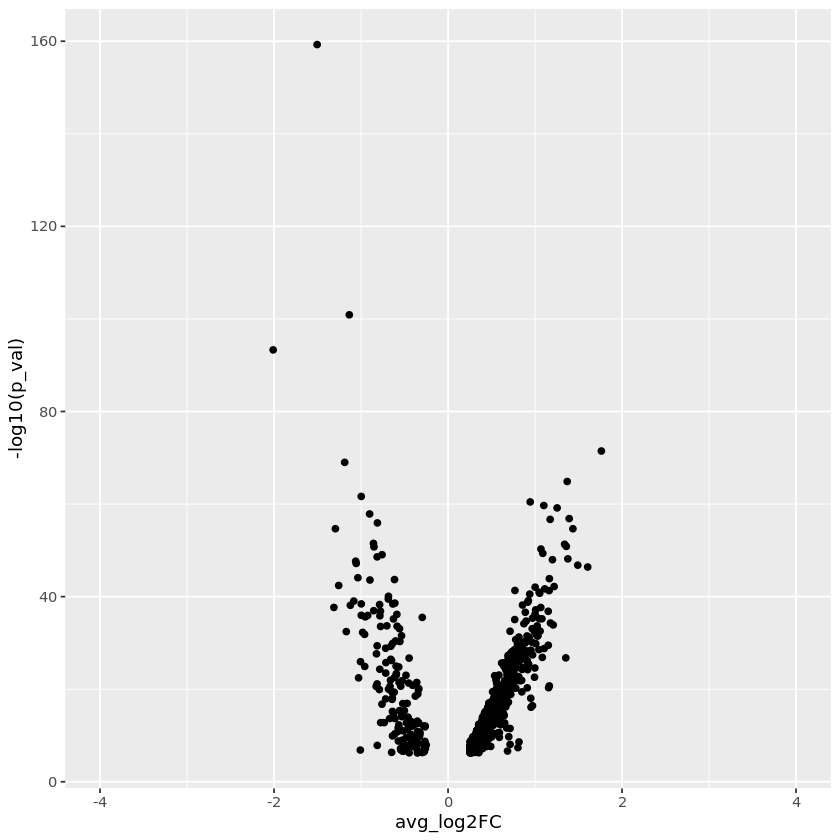

[1] 3

[1] "RYR2" "RYR3" "NAV2"

[1] 2

[1] "EYA1"  "FGFR2"

[1] 190

[1] 110

[1] "AKT3"

[1] 1

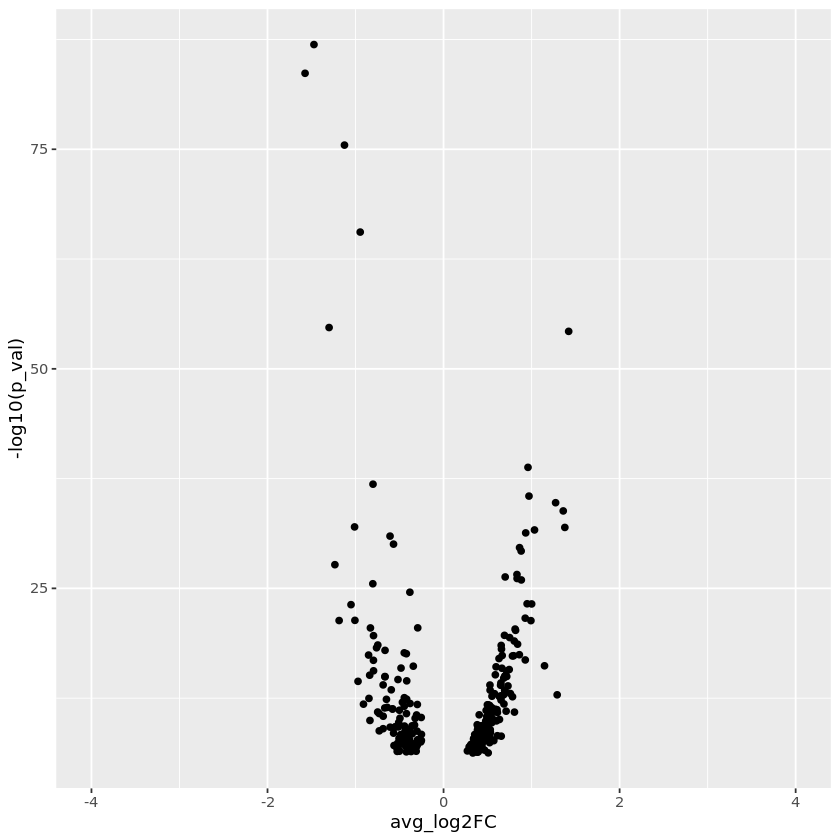

[1] 1

[1] "AKT3"

[1] 0

character(0)

[1] 47

[1] 89

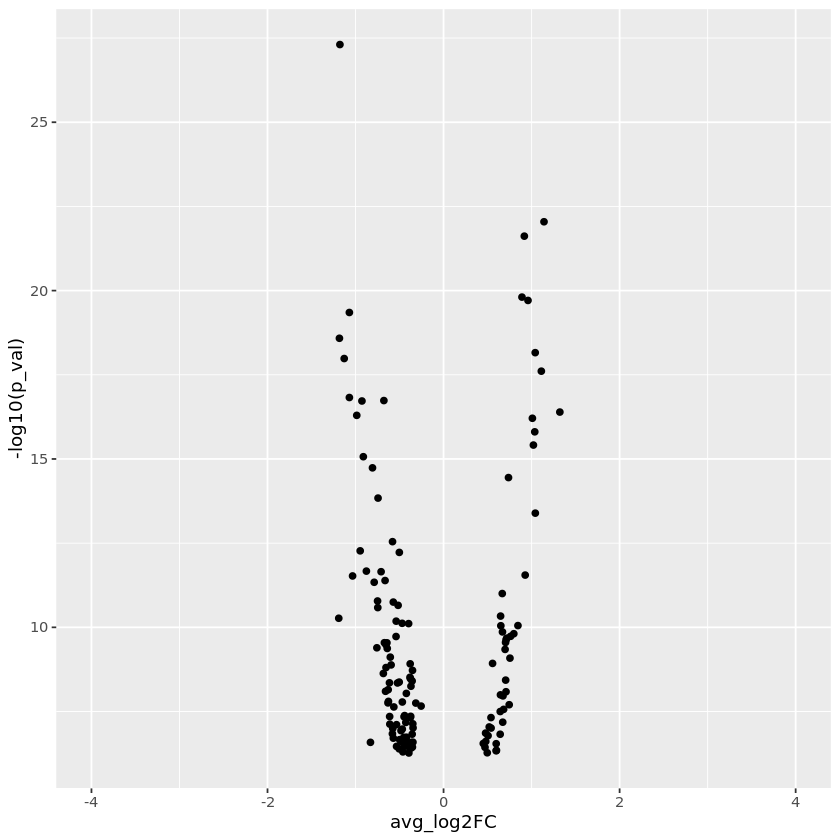

In [101]:
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_Ast.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_Ast.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

In [102]:
intersect(hmedegup,intersect(tscdegup,fcddegup))

[1] "PPP2R2B" "COL5A3"  "RASSF4"

In [103]:
intersect(c(tscdegup,tscdegdown),c(hmedegup,hmedegdown))

[1] "ROBO2"     "RBFOX1"    "KCNIP4"    "TNC"       "OPCML"     "PTPRD"    
  [7] "LRP1B"     "CSMD1"     "NKAIN2"    "SNRNP70"   "SHISA9"    "RASSF4"   
 [13] "RALGDS"    "RYR2"      "GRID2"     "PABPN1"    "NRXN3"     "CNTNAP2"  
 [19] "B4GALNT4"  "LRRC7"     "LUC7L3"    "GRIK2"     "SYT1"      "DTNA"     
 [25] "CCSER1"    "RYR3"      "CELF4"     "CHD5"      "CLU"       "KCND2"    
 [31] "NRG1"      "RALYL"     "ASIC2"     "DDX5"      "LRRTM4"    "CHD4"     
 [37] "COL5A3"    "PALLD"     "KIRREL3"   "APBA2"     "MTRNR2L12" "KHDRBS2"  
 [43] "UPF3A"     "IGFBP7"    "SUMF1"     "IL1RAPL1"  "WWOX"      "FGF14"    
 [49] "PILRB"     "MYT1L"     "SLC13A3"   "SORCS2"    "SMAD1"     "XKR4"     
 [55] "AKAP10"    "ITPR2"     "BCL6"      "ANKRD36"   "NRBP2"     "GLIS3"    
 [61] "CDK5RAP3"  "KCNQ5"     "LRIG1"     "DCLK2"     "PPP2R2B"   "SLC4A10"  
 [67] "RGL1"      "ACADVL"    "SGCZ"      "LINGO2"    "CCNL1"     "PTPRZ1"   
 [73] "MFHAS1"    "KNDC1"     "NPNT"      "CHPT1"     "NPAS3"     "AQP4"     
 [79] "HPSE2"     "ZNF98"     "HSPA1B"    "JUND"      "HSPA1A"    "SUMO3"    
 [85] "GRM3"      "MT3"       "PREX2"     "SLC1A2"    "COL4A3"    "MERTK"    
 [91] "LGI1"      "CAMK2N1"   "RERG"      "OAF"       "ARPP19"    "SLC4A4"   
 [97] "GPC5"      "SPARCL1"   "GPM6A"     "SLC6A12"   "DNAJB1"    "ABCD2"    
[103] "MMD2"      "TPD52L1"   "PDE10A"    "FGFR2"     "CACNB2"    "ACSS1"    
[109] "SNAP25"    "TSPYL4"    "HSP90AB1"  "CHRDL1"    "OLFM2"     "C1QTNF1"  
[115] "ASAP2"     "NHSL1"     "PITPNC1"   "PTN"       "GABRB1"    "DYNLL2"   
[121] "ACSL6"     "GLI3"      "DNAJA4"    "MTRNR2L8"  "DCHS2"     "ATP13A4"  
[127] "EFR3B"     "MYO1B"     "ADAMTS17"  "TSPYL1"    "GABRA2"    "FGD6"     
[133] "AHCYL2"    "ACSBG1"    "NPTXR"     "ACOT11"    "LZTS1"     "SLC7A11"  
[139] "PRNP"

In [104]:
intersect(hmedegdown,intersect(tscdegdown,fcddegdown))

[1] "HSPA1B"   "PDE10A"   "JUND"     "HSPA1A"   "HSP90AB1" "NPTXR"   
 [7] "SNAP25"   "ARPP19"   "TSPYL1"   "TSPYL4"   "DNAJA4"   "PRNP"

In [105]:
intersect(hmedegup,intersect(tscdegup,fcddegup))

[1] "PPP2R2B" "COL5A3"  "RASSF4"

In [106]:
intersect(tscdegup,fcddegup)
intersect(hmedegup,fcddegup)
intersect(hmedegup,tscdegup)

[1] "RBFOX1"  "OPCML"   "RASSF4"  "DST"     "COL5A3"  "PPP2R2B"

[1] "SLC1A3"     "NTM"        "RORA"       "PPP2R2B"    "PRODH"     
 [6] "CSGALNACT1" "PITPNC1"    "PHF21B"     "CACNB2"     "HIF3A"     
[11] "GNA14"      "TPCN1"      "ACACB"      "PARD3"      "KIF1B"     
[16] "MT3"        "COL5A3"     "JARID2"     "MSI2"       "DGKG"      
[21] "ETNPPL"     "SLC27A1"    "PLEKHG1"    "MMD2"       "FMNL2"     
[26] "MOK"        "SLC39A11"   "PAPLN"      "SNTA1"      "RASSF4"    
[31] "CABLES1"    "PHYHD1"

[1] "NPAS3"    "PPP2R2B"  "TNC"      "DTNA"     "ITPR2"    "WWOX"    
 [7] "LRIG1"    "LRP1B"    "CHPT1"    "SNRNP70"  "MFHAS1"   "GRID2"   
[13] "DCLK2"    "GLIS3"    "PALLD"    "COL5A3"   "NRBP2"    "SORCS2"  
[19] "PTPRZ1"   "NPNT"     "RYR3"     "B4GALNT4" "SUMF1"    "UPF3A"   
[25] "ACADVL"   "KNDC1"    "SLC13A3"  "AKAP10"   "PILRB"    "CHD4"    
[31] "PABPN1"   "RALGDS"   "CLU"      "RASSF4"   "BCL6"     "CDK5RAP3"
[37] "KCND2"    "LRRTM4"   "DDX5"     "AQP4"     "SMAD1"    "APBA2"   
[43] "RGL1"     "CCNL1"    "IGFBP7"

In [107]:
intersect(tscdegdown,fcddegdown)
intersect(hmedegdown,fcddegdown)
intersect(hmedegdown,tscdegdown)

[1] "HSPA1B"   "WIF1"     "JUND"     "SERPINE2" "HSPA1A"   "GRM3"    
 [7] "LGI1"     "CPE"      "ARPP19"   "METTL7A"  "UBC"      "HSPB1"   
[13] "FZD3"     "PDE10A"   "SNAP25"   "SGIP1"    "TSPYL4"   "HSP90AB1"
[19] "ITM2B"    "PTAR1"    "DNAJA4"   "DNAJB6"   "TSPAN7"   "TSPYL1"  
[25] "GABRA2"   "PTMA"     "MORF4L1"  "ELAVL1"   "NPTXR"    "PRICKLE2"
[31] "TUBA1B"   "SLC7A11"  "PRNP"

[1] "HSPA1B"   "MAP1B"    "PDE10A"   "JUND"     "HSPA1A"   "HSP90AB1"
 [7] "HSP90AA1" "NPTXR"    "RTN1"     "SNAP25"   "CCK"      "ARPP19"  
[13] "TSPYL1"   "NRGN"     "SNCB"     "SCG2"     "CREG2"    "YWHAG"   
[19] "TSPYL4"   "UCHL1"    "HSPH1"    "BASP1"    "DNAJA4"   "TOMM20"  
[25] "LMO4"     "ATP1B1"   "PPP3R1"   "PRNP"     "ATP6V0B"  "HNRNPK"

[1] "HPSE2"    "HSPA1B"   "PDE10A"   "TPD52L1"  "JUND"     "HSPA1A"  
 [7] "HSP90AB1" "NPTXR"    "ZNF98"    "DCHS2"    "SNAP25"   "MTRNR2L8"
[13] "CAMK2N1"  "ARPP19"   "TSPYL1"   "SUMO3"    "C1QTNF1"  "TSPYL4"  
[19] "DNAJA4"   "DYNLL2"   "COL4A3"   "MYO1B"    "LZTS1"    "PRNP"    
[25] "DNAJB1"   "SLC6A12"

# DEGs in ExN lineage

An object of class Seurat 
35211 features across 11591 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "RYR2"   "PTPN11" "NFAT5"  "LRP11"  "RYR3"   "CASK"

[1] 6

[1] 3

[1] "RYR2" "RYR3" "CASK"

[1] 3

[1] "PTPN11" "NFAT5"  "LRP11"

[1] 335

[1] 861

[1] "RYR2"    "LRP11"   "RHEB"    "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2"
[8] "RYR3"

[1] 8

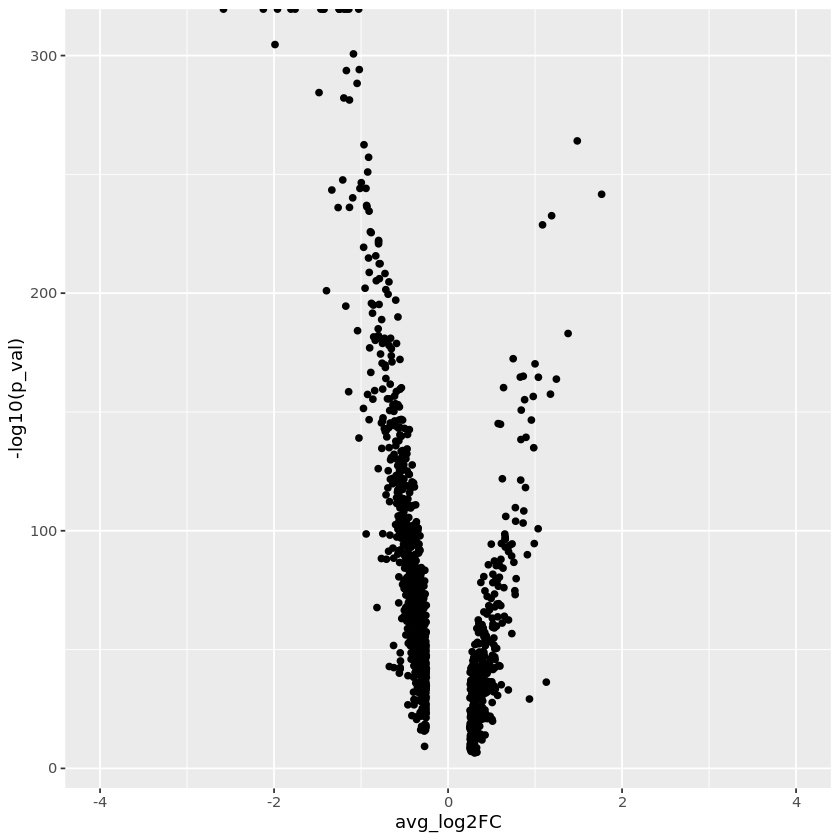

[1] 2

[1] "RYR2" "RYR3"

[1] 6

[1] "LRP11"   "RHEB"    "PTPN11"  "NFAT5"   "HIP1"    "SLC24A2"

[1] 311

[1] 1037

[1] "RHEB"    "BRAF"    "LRP11"   "NFAT5"   "NAV2"    "RYR2"    "MAPK9"  
 [8] "SLC24A2" "PCNT"    "KIF26B"  "ASH1L"

[1] 11

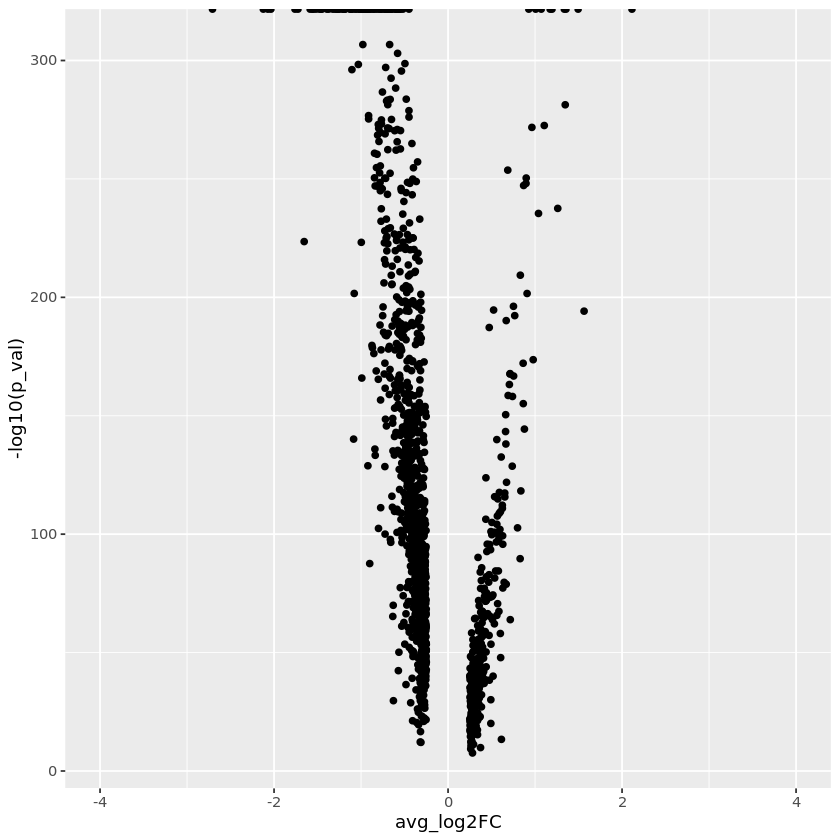

[1] 5

[1] "NAV2"   "RYR2"   "PCNT"   "KIF26B" "ASH1L"

[1] 6

[1] "RHEB"    "BRAF"    "LRP11"   "NFAT5"   "MAPK9"   "SLC24A2"

[1] 262

[1] 946

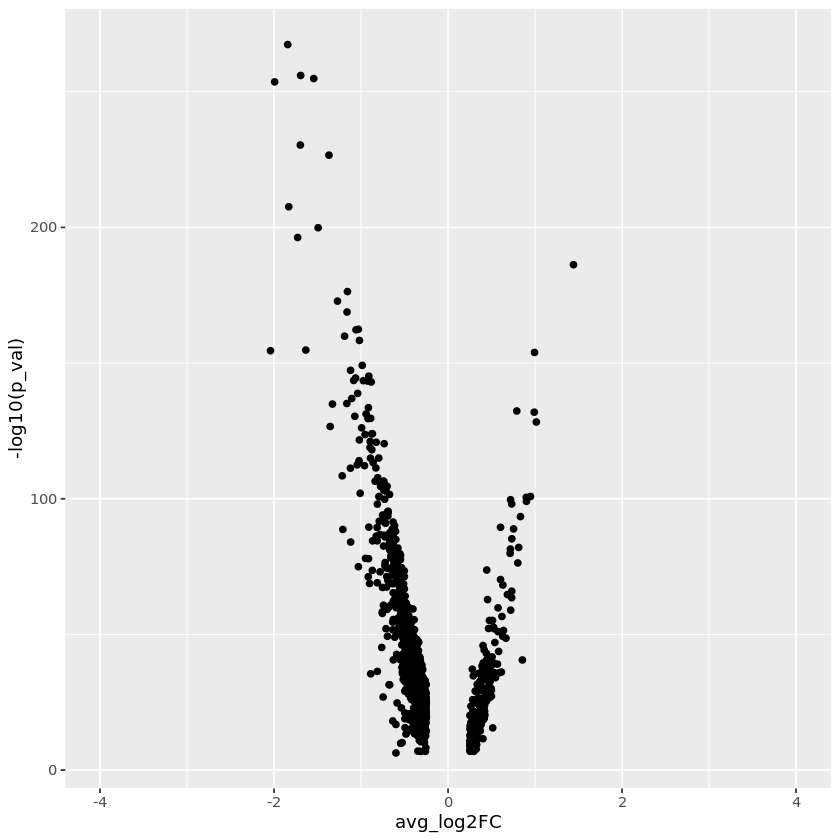

In [113]:
df0<-readRDS("../Publication/SeuratObject.rds")
df0<-subset(df0,subset=cell_type %in% c('ExN1','ExN2','ExN3','ExN-L1','ExN-L2'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_ExN.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_ExN.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

# DEGs in OPC lineage

An object of class Seurat 
35211 features across 3293 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "CASK"   "RYR2"   "NAV2"   "CSMD3"  "BRAF"   "PIK3R3"

[1] 6

[1] 5

[1] "CASK"   "NAV2"   "CSMD3"  "BRAF"   "PIK3R3"

[1] 1

[1] "RYR2"

[1] 599

[1] 79

[1] "RYR2"   "RYR3"   "KIF26B"

[1] 3

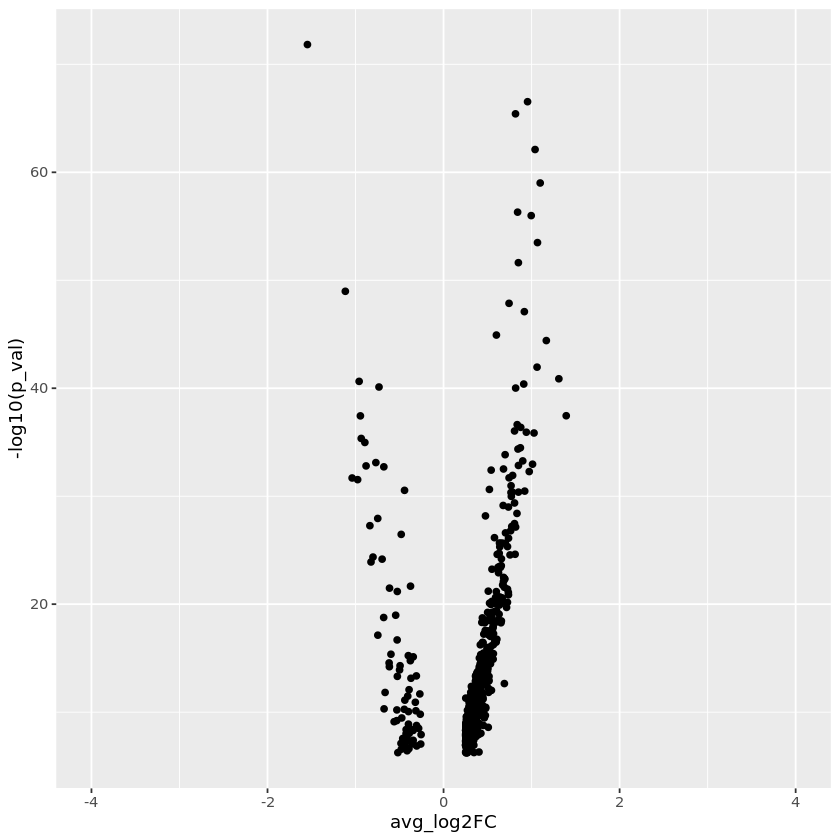

[1] 2

[1] "RYR2" "RYR3"

[1] 1

[1] "KIF26B"

[1] 161

[1] 115

[1] "KIF26B"

[1] 1

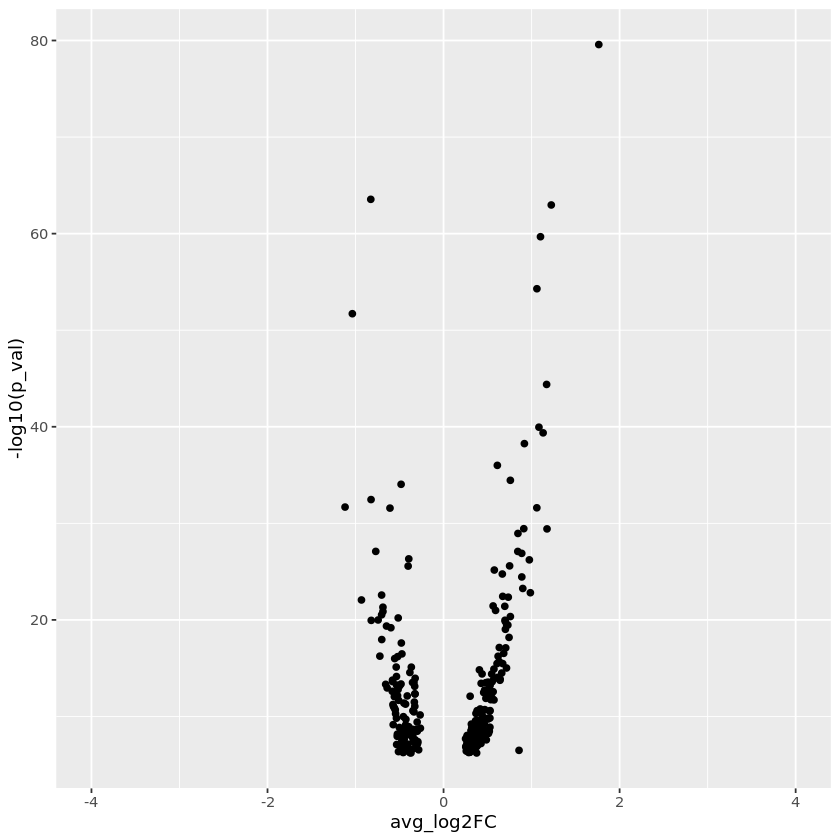

[1] 1

[1] "KIF26B"

[1] 0

character(0)

[1] 86

[1] 91

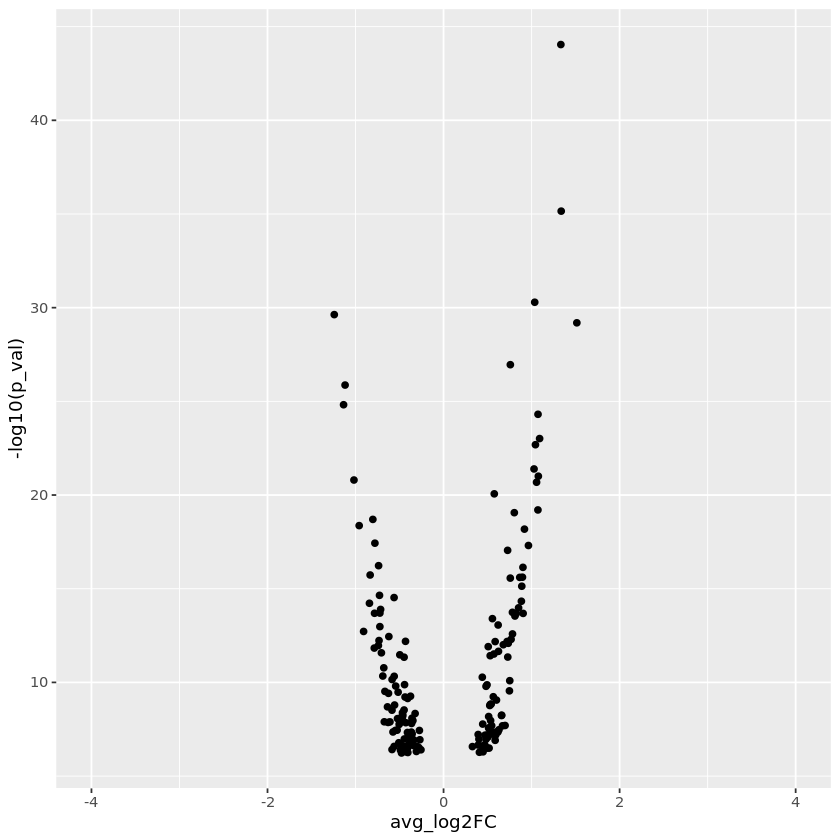

In [114]:
df0<-readRDS("../Publication/SeuratObject.rds")
df0<-subset(df0,subset=cell_type %in% c('OPC','OPC-L1','OPC-L2'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_OPC.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_OPC.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]

# DEGs in OD lineage

An object of class Seurat 
35211 features across 3030 samples within 3 assays 
Active assay: SCT (16449 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

[1] "FGFR2"

[1] 1

[1] 1

[1] "FGFR2"

[1] 0

character(0)

[1] 135

[1] 66

[1] "SLC24A2" "RYR2"

[1] 2

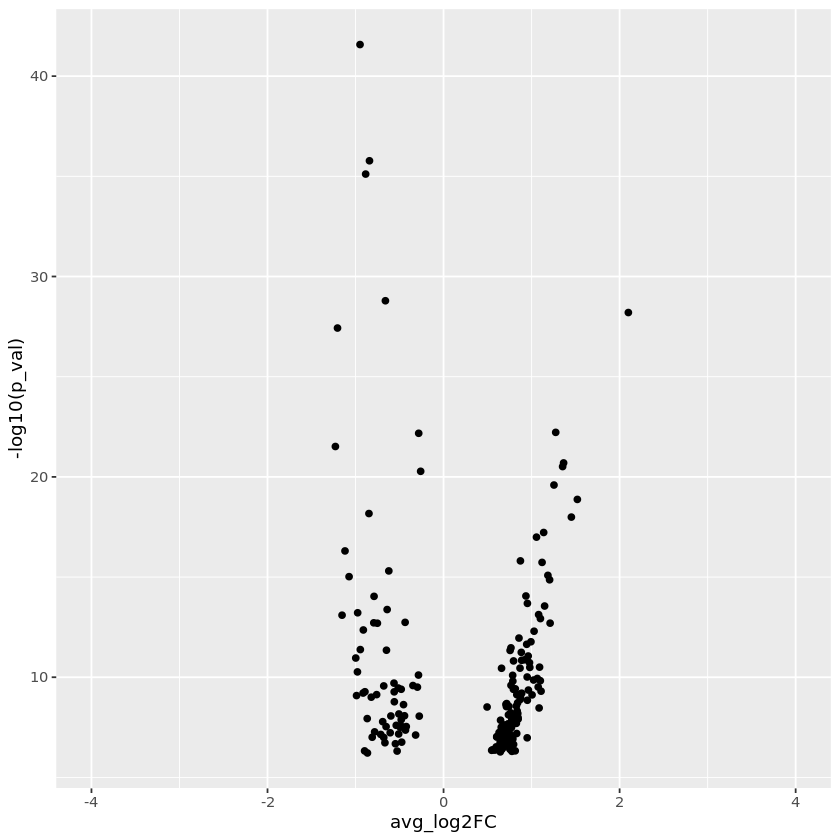

[1] 1

[1] "RYR2"

[1] 1

[1] "SLC24A2"

[1] 40

[1] 34

character(0)

[1] 0

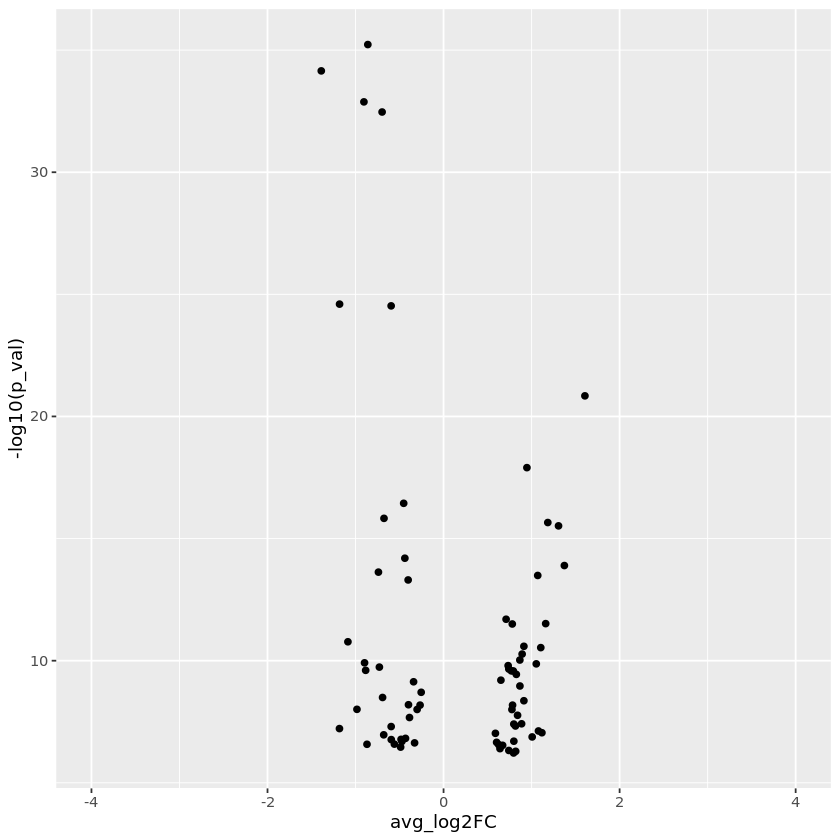

[1] 0

character(0)

[1] 0

character(0)

[1] 19

[1] 6

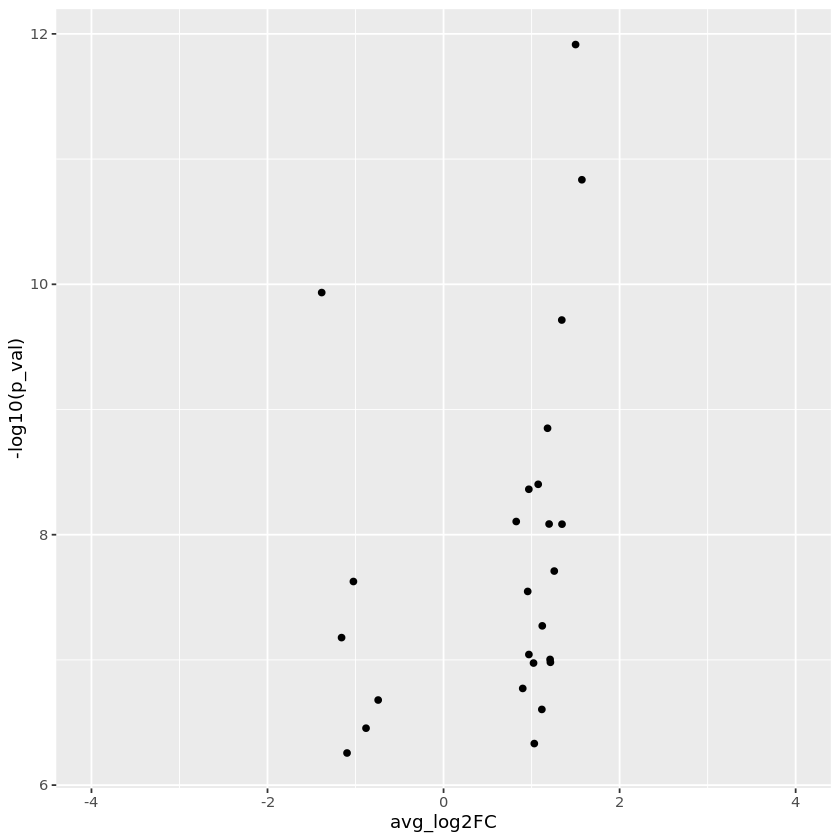

In [115]:
df0<-readRDS("../Publication/SeuratObject.rds")
df0<-subset(df0,subset=cell_type %in% c('OD','OD-L'))
df0
Idents(df0)<- "disease"
DEX <- FindMarkers(df0, ident.1 = "HME", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_HME_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_HME_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 
length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
hmedegup <- df$X[df$avg_log2FC>0]
hmedegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "TSC", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_TSC_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_TSC_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
tscdegup <- df$X[df$avg_log2FC>0]
tscdegdown <- df$X[df$avg_log2FC<0]

DEX <- FindMarkers(df0, ident.1 = "FCD", ident.2 = "CTRL")
DEX <- DEX %>%
        filter(p_val_adj < 0.01) %>%
        mutate(diff.pct = pct.1 - pct.2)
DEX <- DEX[!(duplicated(row.names(DEX))),]
write.csv(DEX, "DEX_FCD_CTRL_OD.csv")
intersect(row.names(DEX),genelist$X)
length(intersect(row.names(DEX),genelist$X))

options(repr.plot.width=7, repr.plot.height=7)
df <- read.csv("DEX_FCD_CTRL_OD.csv", header=T)
ggplot(data=df, aes(x=avg_log2FC, y=-log10(p_val)))+geom_point()+xlim(-4,4) 

length(intersect(df$X[df$avg_log2FC>0],genelist$X))
intersect(df$X[df$avg_log2FC>0],genelist$X)
length(intersect(df$X[df$avg_log2FC<0],genelist$X))
intersect(df$X[df$avg_log2FC<0],genelist$X)
length(df$X[df$avg_log2FC>0])
length(df$X[df$avg_log2FC<0])
fcddegup <- df$X[df$avg_log2FC>0]
fcddegdown <- df$X[df$avg_log2FC<0]